# **DropSeq MCF7 Cell Line: ```train``` data**

-----


In this file, we will perform an exploratory data analysis and the unsupervised and supervised learning on the ```train``` dataset for the MCF7 cell line with the DropSeq technique.

# **Introduction**

The data that we are going to analyse is gene expression data. This data refers to a cell line of MCF7 that has been sequenced using Drop Seq. Since we are going to follow closely the procedure of the HCC1806 cell line, we are going to omit most of the details.


# **Python Libraries**

We write down here the main packages that we'll be using along the project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import kurtosis, skew
import plotly.express as px
import matplotlib.colors as colors
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

np.random.seed(42)

assert pd.__version__ <= "1.5.3" # some cells will NOT run in the new 2.0 version!

Let's import the paths of the datasets. We inform the reader that the datasets are not public and we will not release them.

In [ ]:
path_m_filtered_norm_train = "./DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt"
path_m_filtered_norm_test = "./DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt"

# **Exploratory Data Analysis**

In this section we are going to analyse the data. Notice that we are given already filtered and normalized data, so we will not need to transform them further.

## Introductory information

In [ ]:
m_train = pd.read_csv(path_m_filtered_norm_train, sep = " ")
m_train.head() 

AAAAACCTATCG_Normoxia  AAAACAACCCTA_Normoxia  AAAACACTCTCA_Normoxia  \
MALAT1                       1                      3                      3   
MT-RNR2                      0                      0                      0   
NEAT1                        0                      0                      0   
H1-5                         0                      0                      0   
TFF1                         4                      1                      1   

         AAAACCAGGCAC_Normoxia  AAAACCTAGCTC_Normoxia  AAAACCTCCGGG_Normoxia  \
MALAT1                       6                      4                      5   
MT-RNR2                      2                      0                      0   
NEAT1                        0                      0                      2   
H1-5                         0                      0                      2   
TFF1                         1                      0                      0   

         AAAACTCGTTGC_Normoxia  AAAAGAGCTCTC_Normoxia  AAAAGCTAGGCG_Normoxia  \
MALAT1                       1                     13                      3   
MT-RNR2                      2                      1                      7   
NEAT1                        0                      1                      2   
H1-5                         0                      0                      0   
TFF1                         0                      2                      0   

         AAAATCGCATTT_Normoxia  ...  TTTTACAGGATC_Hypoxia  \
MALAT1                       3  ...                     0   
MT-RNR2                      0  ...                     0   
NEAT1                        0  ...                     0   
H1-5                         0  ...                     0   
TFF1                         1  ...                     2   

         TTTTACCACGTA_Hypoxia  TTTTATGCTACG_Hypoxia  TTTTCCAGACGC_Hypoxia  \
MALAT1                      2                     1                     0   
MT-RNR2                     0                     0                     0   
NEAT1                       0                     0                     0   
H1-5                        1                     0                     0   
TFF1                        3                     8                     0   

         TTTTCGCGCTCG_Hypoxia  TTTTCGCGTAGA_Hypoxia  TTTTCGTCCGCT_Hypoxia  \
MALAT1                      1                     0                     1   
MT-RNR2                     0                     0                     0   
NEAT1                       0                     0                     0   
H1-5                        1                     0                     0   
TFF1                        0                     3                     4   

         TTTTCTCCGGCT_Hypoxia  TTTTGTTCAAAG_Hypoxia  TTTTTTGTATGT_Hypoxia  
MALAT1                      0                     0                     4  
MT-RNR2                     0                     0                     0  
NEAT1                       0                     0                     0  
H1-5                        1                     0                     0  
TFF1                        2                     6                     0  

[5 rows x 21626 columns]

In [ ]:
m_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, MALAT1 to SUDS3
Columns: 21626 entries, AAAAACCTATCG_Normoxia to TTTTTTGTATGT_Hypoxia
dtypes: int64(21626)
memory usage: 495.0+ MB


In [ ]:
m_train.shape

(3000, 21626)

In [ ]:
print("Dataframe indexes: ", m_train.index)
print("Dataframe columns: ", m_train.columns)

Dataframe indexes:  Index(['MALAT1', 'MT-RNR2', 'NEAT1', 'H1-5', 'TFF1', 'MT-RNR1', 'H4C3',
       'GDF15', 'KRT81', 'MT-CO3',
       ...
       'MROH1', 'SKIDA1', 'MICALL1', 'RARG', 'MYO1F', 'BRWD1-AS2', 'RPS19BP1',
       'AUNIP', 'TNK2', 'SUDS3'],
      dtype='object', length=3000)
Dataframe columns:  Index(['AAAAACCTATCG_Normoxia', 'AAAACAACCCTA_Normoxia',
       'AAAACACTCTCA_Normoxia', 'AAAACCAGGCAC_Normoxia',
       'AAAACCTAGCTC_Normoxia', 'AAAACCTCCGGG_Normoxia',
       'AAAACTCGTTGC_Normoxia', 'AAAAGAGCTCTC_Normoxia',
       'AAAAGCTAGGCG_Normoxia', 'AAAATCGCATTT_Normoxia',
       ...
       'TTTTACAGGATC_Hypoxia', 'TTTTACCACGTA_Hypoxia', 'TTTTATGCTACG_Hypoxia',
       'TTTTCCAGACGC_Hypoxia', 'TTTTCGCGCTCG_Hypoxia', 'TTTTCGCGTAGA_Hypoxia',
       'TTTTCGTCCGCT_Hypoxia', 'TTTTCTCCGGCT_Hypoxia', 'TTTTGTTCAAAG_Hypoxia',
       'TTTTTTGTATGT_Hypoxia'],
      dtype='object', length=21626)


In [ ]:
m_train.dtypes.unique() 

array([dtype('int64')], dtype=object)

In this case we have 21626 cells and 3000 genes. With respect to the data coming from SmartSeq, we see that we have a lot more cells.

Here we are still dealing with a gene expression matrix, with cells in the columns and genes in the indexes.
As before, genes are identified by their name. Instead, cells are identified by a short DNA barcode (e.g., TTTTACAGGATC) that is specific to each cell, and with a label (i.e., Hypoxia or Normoxia) that indicates the experimental condition of the cell. 

## Sparsity

At this stage, it is important to get an idea of the sparsity of the data. We can expect that indeed we have sparse data, since they have been sequenced using DropSeq. 

Yet, let's start first with some basic information.

In [ ]:
m_train.isna().sum().sum()

0

 Now we do an initial inspection of the distribution of the data.

In [ ]:
m_train.describe()

AAAAACCTATCG_Normoxia  AAAACAACCCTA_Normoxia  AAAACACTCTCA_Normoxia  \
count            3000.000000            3000.000000            3000.000000   
mean                0.034000               0.030333               0.027000   
std                 0.277254               0.220823               0.195662   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.000000               0.000000               0.000000   
max                 4.000000               4.000000               5.000000   

       AAAACCAGGCAC_Normoxia  AAAACCTAGCTC_Normoxia  AAAACCTCCGGG_Normoxia  \
count            3000.000000            3000.000000            3000.000000   
mean                0.032333               0.045333               0.047333   
std                 0.233751               0.246235               0.299649   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.000000               0.000000               0.000000   
max                 6.000000               4.000000               8.000000   

       AAAACTCGTTGC_Normoxia  AAAAGAGCTCTC_Normoxia  AAAAGCTAGGCG_Normoxia  \
count            3000.000000            3000.000000            3000.000000   
mean                0.030000               0.027333               0.032000   
std                 0.204403               0.292030               0.281074   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.000000               0.000000               0.000000   
max                 6.000000              13.000000               7.000000   

       AAAATCGCATTT_Normoxia  ...  TTTTACAGGATC_Hypoxia  TTTTACCACGTA_Hypoxia  \
count            3000.000000  ...           3000.000000           3000.000000   
mean                0.027333  ...              0.052333              0.043667   
std                 0.237918  ...              0.364654              0.244499   
min                 0.000000  ...              0.000000              0.000000   
25%                 0.000000  ...              0.000000              0.000000   
50%                 0.000000  ...              0.000000              0.000000   
75%                 0.000000  ...              0.000000              0.000000   
max                 6.000000  ...              7.000000              4.000000   

       TTTTATGCTACG_Hypoxia  TTTTCCAGACGC_Hypoxia  TTTTCGCGCTCG_Hypoxia  \
count           3000.000000           3000.000000           3000.000000   
mean               0.033667              0.033000              0.025333   
std                0.340449              0.302117              0.208261   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max               10.000000              8.000000              6.000000   

       TTTTCGCGTAGA_Hypoxia  TTTTCGTCCGCT_Hypoxia  TTTTCTCCGGCT_Hypoxia  \
count           3000.000000           3000.000000           3000.000000   
mean               0.037000              0.046333              0.055667   
std                0.286924              0.301469              0.358623   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0

In [ ]:
m_train.transpose().describe()

MALAT1       MT-RNR2         NEAT1          H1-5          TFF1  \
count  21626.000000  21626.000000  21626.000000  21626.000000  21626.000000   
mean       3.634791      0.850458      0.136086      0.368862      1.799362   
std        6.837353      1.721088      0.643060      0.953887      2.486034   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        2.000000      0.000000      0.000000      0.000000      1.000000   
75%        4.000000      1.000000      0.000000      0.000000      3.000000   
max      175.000000     32.000000     23.000000     22.000000     46.000000   

            MT-RNR1          H4C3         GDF15         KRT81        MT-CO3  \
count  21626.000000  21626.000000  21626.000000  21626.000000  21626.000000   
mean       0.291362      1.730972      0.011884      0.026912      0.105105   
std        0.740664      2.328460      0.189425      0.233430      0.387558   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      2.000000      0.000000      0.000000      0.000000   
max       16.000000     44.000000     20.000000     17.000000      5.000000   

       ...         MROH1        SKIDA1       MICALL1          RARG  \
count  ...  21626.000000  21626.000000  21626.000000  21626.000000   
mean   ...      0.008046      0.002035      0.003930      0.016138   
std    ...      0.092892      0.048995      0.065461      0.131046   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      2.000000      3.000000      2.000000      3.000000   

              MYO1F     BRWD1-AS2      RPS19BP1         AUNIP          TNK2  \
count  21626.000000  21626.000000  21626.000000  21626.000000  21626.000000   
mean       0.000971      0.000832      0.034172      0.002405      0.003884   
std        0.032598      0.028839      0.200548      0.053491      0.064395   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        2.000000      1.000000      4.000000      3.000000      2.000000   

              SUDS3  
count  21626.000000  
mean       0.088042  
std        0.323733  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        3.000000  

[8 rows x 3000 columns]

In [ ]:
m_train_entries1 = m_train.copy().astype(bool).astype(int)
print("Average expressed genes by each cell: ", np.count_nonzero(m_train_entries1, axis=0).mean().round(3))
print("Average expressing cells for each gene: ", np.count_nonzero(m_train_entries1, axis=1).mean().round(3))

Average expressed genes by each cell:  74.117
Average expressing cells for each gene:  534.285


In [ ]:
sparsity_index_unfiltered = 1 - (np.count_nonzero(m_train.values) / m_train.size)
sparsity_index_unfiltered

0.9752943062363205

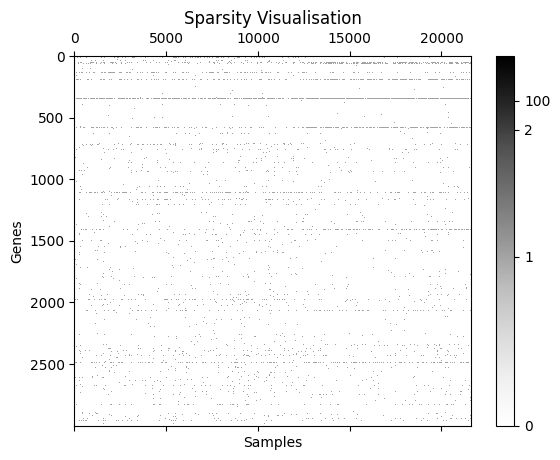

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        # Note also that we must extrapolate beyond vmin/vmax
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.8, 1.]
        return np.ma.masked_array(np.interp(value, x, y,
                                            left=-np.inf, right=np.inf))

    def inverse(self, value):
        y, x = [self.vmin, self.vcenter, self.vmax], [0, 0.8, 1]
        return np.interp(value, x, y, left=-np.inf, right=np.inf)


fig, ax = plt.subplots()
midnorm = MidpointNormalize(vmin=0, vcenter=1.75, vmax=250)

graph_temporary = plt.spy(m_train, aspect = "auto", norm=midnorm,
                   cmap='Greys') #hsv
plt.colorbar(graph_temporary).set_ticks([0, 1, 2, 100])
plt.grid(False)
plt.xlabel("Samples")
plt.ylabel("Genes")
ax.set_title('Sparsity Visualisation')

plt.show()

From the visualization and from the sparsity index, we see that the data is extremely sparse. In fact, it is much sparser than the data obtained using SmartSeq.

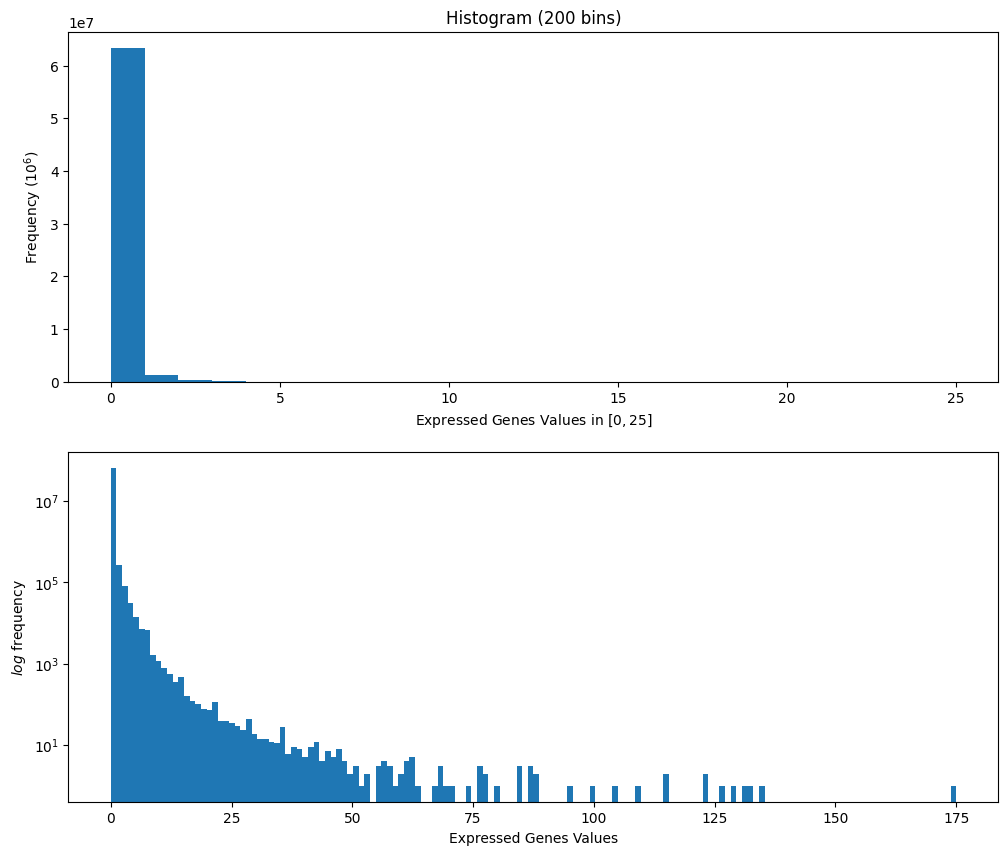

In [ ]:
m_train_flattened = pd.Series(m_train.values.flatten())
fig, ax = plt.subplots(2, 1, figsize=(12, 10)) 
ax[0].hist(m_train_flattened, range = [0, 25], bins = 25)
ax[0].set_xlabel("Expressed Genes Values in $[0, 25]$")
ax[0].set_ylabel("Frequency ($10^6$)")
ax[0].set_title("Histogram (200 bins)")
m_train_flattened = m_train_flattened
ax[1].hist(m_train_flattened, bins = 150, log = True)
ax[1].set_xlabel("Expressed Genes Values")
ax[1].set_ylabel("$log$ frequency")
plt.show()

In [ ]:
round(m_train_flattened.describe())

count    64878000.0
mean            0.0
std             0.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max           175.0
dtype: float64

In [ ]:
skew_matrix = skew(m_train_flattened)
kurtosis_matrix = kurtosis(m_train_flattened)
print("Skewness of the whole matrix: ", round(skew_matrix))
print("Kurtosis of the whole matrix: ", round(kurtosis_matrix))

Skewness of the whole matrix:  44
Kurtosis of the whole matrix:  10010


Notice that the data is decreasing faster than exponentially, so it means that the distribution has a very heavy tail, as the high kurtosis suggests us. Also, the skewness confirms that the distribution is not symmetric.

Now let's see some interesting informations.

In [ ]:
min_expressed_gene = m_train.sum(axis = 1).idxmin()
print("Least expressed gene: {}\nNumber of codifying samples: {}".format(min_expressed_gene, m_train.sum(axis = 1)[min_expressed_gene]))

max_expressed_gene = m_train.sum(axis = 1).idxmax()
print("\nMost expressed gene: {}\nNumber of codifying samples: {}".format(max_expressed_gene, m_train.sum(axis = 1)[max_expressed_gene]))

min_expressed_gene = m_train.sum(axis = 0).idxmin()
print("\nLeast expressed cell: {}\nProduced genes:{}\nUnique genes:{}\n".format(min_expressed_gene, m_train.sum(axis = 0)[min_expressed_gene], m_train.astype(bool).sum(axis = 0).min()))

max_expressed_gene = m_train.sum(axis = 0).idxmax()
print("Most expressed cell: {}\nProduced genes:{}\nUnique genes:{}".format(max_expressed_gene, m_train.sum(axis = 0)[max_expressed_gene], m_train.astype(bool).sum(axis = 0).max()))

Least expressed gene: FOXP3
Number of codifying samples: 8

Most expressed gene: MALAT1
Number of codifying samples: 78606

Least expressed cell: CTGCCTATGGGC_Normoxia
Produced genes:45
Unique genes:21

Most expressed cell: GAAGTGAGGGCC_Hypoxia
Produced genes:245
Unique genes:189


In [ ]:
print(pd.DataFrame({'gene': m_train.idxmax(), 'value': m_train.max()}))
print("Uniques[{}]: {}".format(m_train.idxmax().unique().size, m_train.idxmax().unique()))

                         gene  value
AAAAACCTATCG_Normoxia    TFF1      4
AAAACAACCCTA_Normoxia   RPL39      4
AAAACACTCTCA_Normoxia  BCYRN1      5
AAAACCAGGCAC_Normoxia  MALAT1      6
AAAACCTAGCTC_Normoxia  MALAT1      4
...                       ...    ...
TTTTCGCGTAGA_Hypoxia     H4C3      7
TTTTCGTCCGCT_Hypoxia    RPS19      7
TTTTCTCCGGCT_Hypoxia    RPS19      9
TTTTGTTCAAAG_Hypoxia     TFF1      6
TTTTTTGTATGT_Hypoxia     H4C3      6

[21626 rows x 2 columns]
Uniques[359]: ['TFF1' 'RPL39' 'BCYRN1' 'MALAT1' 'ACTB' 'PARD6B' 'MT-RNR2' 'RPL35A'
 'PABPC1' 'H4C3' 'DNAJA1' 'RPLP1' 'NAA10' 'RPL35' 'RPS12' 'MT-RNR1' 'KRT8'
 'RPS19' 'H1-5' 'H19' 'PFDN4' 'RPS16' 'RPL13' 'RPL23' 'SERF2' 'RPL36'
 'RPL11' 'HNRNPA2B1' 'EIF5B' 'RPL12' 'ENO1' 'CSDE1' 'DSCAM-AS1' 'FTL'
 'PKIB' 'HNRNPD' 'PAPOLA' 'HSPB1' 'GATA3' 'AP1G1' 'NCOA3' 'CEP63' 'RPS5'
 'RPL34' 'MT-ND6' 'SET' 'HDGF' 'ATP1A1' 'SOCS4' 'MT-ND4' 'H1-4' 'YWHAB'
 'ARPP19' 'TPD52L1' 'RPS15' 'S100A11' 'SNX27' 'RPS27' 'KDM1B' 'MT-CO3'
 'ROMO1' 'RPS15A

Let's now analyse normoxic and hypoxic cells

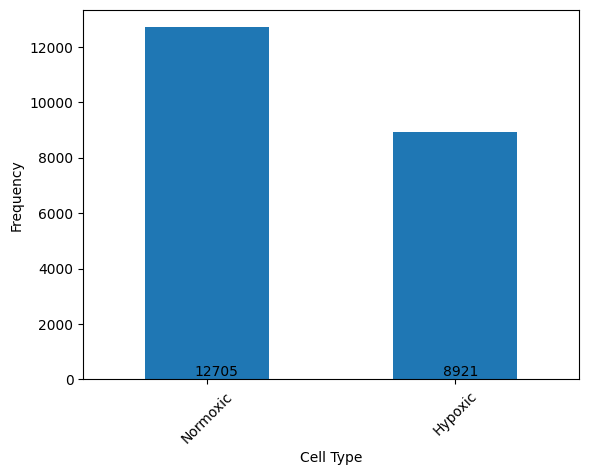

In [ ]:
normoxic_cells = m_train.columns.str.contains('Normoxia').sum()
hypoxic_cells = m_train.columns.str.contains('Hypoxia').sum()
s = pd.Series({"Normoxic" : normoxic_cells, "Hypoxic" : hypoxic_cells})
s.plot.bar(rot = 45)
plt.text(-0.05, 118, str(normoxic_cells))
plt.text(0.95, 127, str(hypoxic_cells))
plt.xlabel("Cell Type")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [ ]:
normoxic_cells = m_train.columns.str.contains('Normoxia')
hypoxic_cells = m_train.columns.str.contains('Hypoxia')
norm_hypo_cells = pd.Series({"Normoxic" : normoxic_cells, "Hypoxic" : hypoxic_cells})

In [ ]:
codified_genes_normoxia = np.count_nonzero(m_train.loc[:, normoxic_cells].values)
codified_genes_hypoxia = np.count_nonzero(m_train.loc[:, hypoxic_cells].values)
print("Codified genes in normoxic cells: ", codified_genes_normoxia)
print("Codified genes in hypoxic cells: ", codified_genes_hypoxia)

Codified genes in normoxic cells:  953760
Codified genes in hypoxic cells:  649096


In [ ]:
sparsity_index_hypoxic = 1 - (np.count_nonzero(m_train.loc[:, hypoxic_cells].values) / m_train.loc[:, hypoxic_cells].size)
sparsity_index_normoxic = 1 - (np.count_nonzero(m_train.loc[:, normoxic_cells].values) / m_train.loc[:, normoxic_cells].size)
print("Sparsity index normoxic: ", sparsity_index_normoxic)
print("Sparsity index hypoxic: ", sparsity_index_hypoxic)

Sparsity index normoxic:  0.9749767807949626
Sparsity index hypoxic:  0.9757465157119904


Differently from the sequencing with SmartSeq, notice that here normoxic cells are more, and more expressed. This is not ideal.

Now let's check the distribution of normoxic/hypoxic cells.

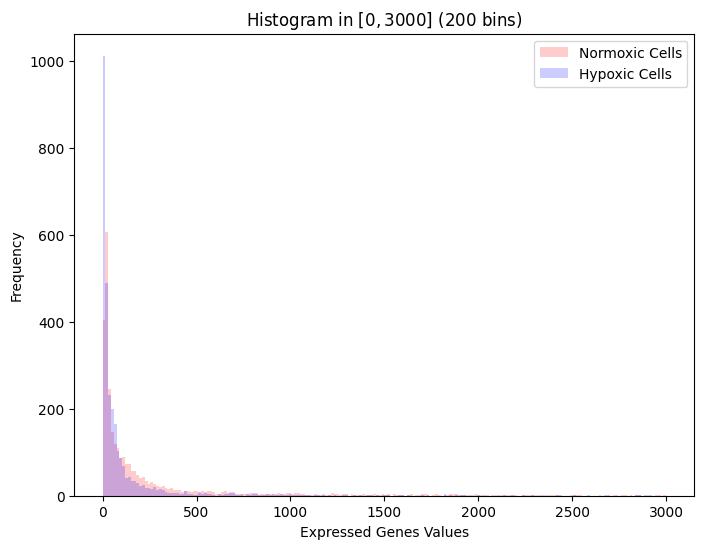

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
ax.hist(m_train.loc[:, normoxic_cells].sum(axis = 1), range = [0, 3000], bins = 200, alpha = 0.2, color = "red", label = "Normoxic Cells")
ax.hist(m_train.loc[:, hypoxic_cells].sum(axis = 1), range = [0, 3000], bins = 200, alpha = 0.2, color = "blue", label = "Hypoxic Cells")
ax.set_xlabel("Expressed Genes Values")
ax.set_ylabel("Frequency")
ax.set_title("Histogram in $[0, 3000]$ (200 bins)")
ax.legend()
plt.show()

We can see that both hypoxic and normoxic cells follow a similar distribution pattern, with most gene expression values being 0. This also tells us that, overall, the cells do not differ in the amount of genes they codify for.

Let's check the most expressed genes in each type.

In [ ]:
print("Top 10 genes of normoxic cells:\n", m_train.loc[:, normoxic_cells].sum(axis = 1).nlargest(10))
print("Top 10 genes of hypoxic cells:\n", m_train.loc[:, hypoxic_cells].sum(axis = 1).nlargest(10))

Top 10 genes of normoxic cells:
 MALAT1     57484
BCYRN1     40515
RPS19      20883
ACTB       18881
MT-RNR2    17522
H4C3       17270
SET        13397
KRT8       12626
RPL35      11893
RPL13      11835
dtype: int64
Top 10 genes of hypoxic cells:
 RPS19     36114
BCYRN1    31412
TFF1      29379
RPL13     22308
MALAT1    21122
RPL35     20718
H4C3      20164
RPS14     19154
RPLP1     16058
RPL12     15039
dtype: int64


So concluding, we see that our dataframe is very sparse.

In [ ]:
m_train_sparr = m_train.astype(pd.SparseDtype("int", 0))
print('dense : {:0.2f} bytes'.format(m_train.memory_usage().sum() / 1e3))
print('sparse: {:0.2f} bytes'.format(m_train_sparr.memory_usage().sum() / 1e3))

dense : 519114.09 bytes
sparse: 19324.36 bytes


Since the data is very sparse, we have decided not to analyse the outliers. As in the SmartSeq case, we expect that most of the information is carried through outliers. 

## Distributions

Now let's analyse better the distribution of the whole dataframe.

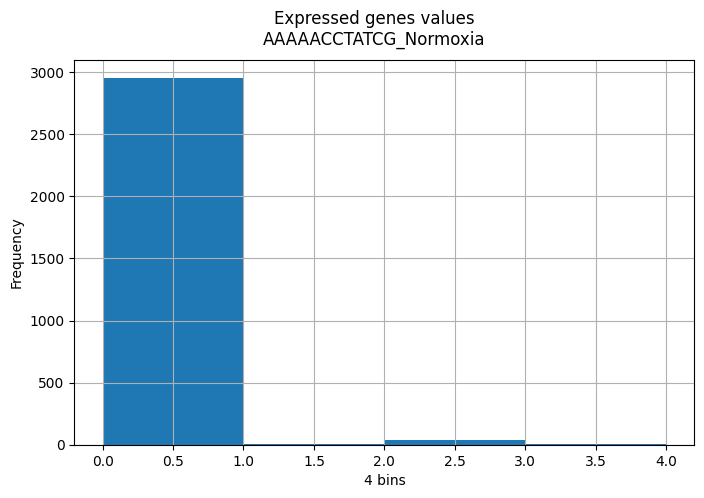

In [ ]:
col = m_train.iloc[:, 0]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
col.hist(bins=4)
plt.suptitle(f"Expressed genes values\n{col.name}")
axs.set_xlabel("4 bins")
axs.set_ylabel("Frequency")
plt.show()

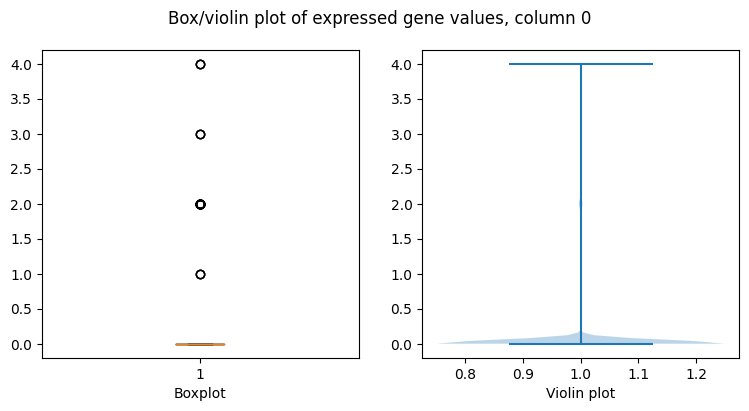

In [ ]:
col = m_train.iloc[:, 0]
fig, ax= plt.subplots(1,2, figsize=(9, 4))
plt.suptitle("Box/violin plot of expressed gene values, column 0")
ax[0].boxplot(col)
ax[1].violinplot(col)
ax[0].set_xlabel("Boxplot")
ax[1].set_xlabel("Violin plot")
plt.show()

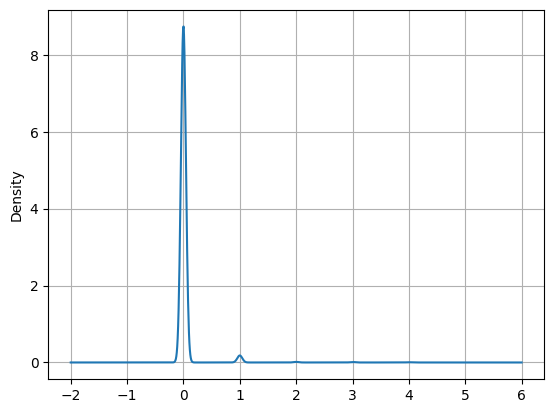

In [ ]:
m_train[m_train.columns[1]].plot.density(legend = False)
plt.grid(True)
plt.show()

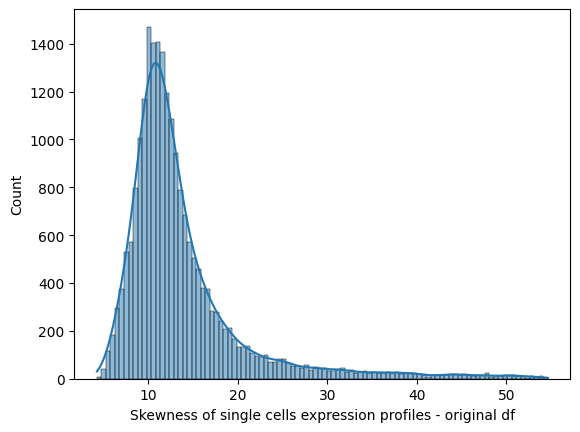

In [ ]:
m_train_colnames = list(m_train.columns)

m_train_colN = np.shape(m_train)[1]
m_train_skew_cells = []
for i in range(m_train_colN):     
     v_df = m_train[m_train_colnames[i]]
     m_train_skew_cells += [skew(v_df)]   
m_train_skew_cells
sns.histplot(m_train_skew_cells, bins=100, kde = True)
plt.xlabel('Skewness of single cells expression profiles - original df')
plt.show()


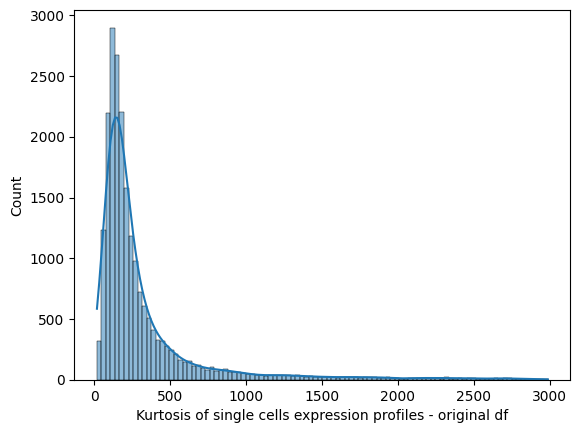

In [ ]:
m_train_kurt_cells = []
for i in range(m_train_colN) :     
     v_df = m_train[m_train_colnames[i]]
     m_train_kurt_cells += [kurtosis(v_df)]   
m_train_kurt_cells
ax = sns.histplot(m_train_kurt_cells,bins=100, kde = True)
plt.xlabel('Kurtosis of single cells expression profiles - original df')
plt.show()

In [ ]:
skewness_list = []
kurtosis_list = []

for col in m_train.columns:
  skewness_list.append(skew(m_train[col]))
  kurtosis_list.append(kurtosis(m_train[col]))

skewness_series = pd.Series(skewness_list)
kurtosis_series = pd.Series(kurtosis_list)

In [ ]:
print("Skewness\n", skewness_series.describe())
print("\nKurtosis\n", kurtosis_series.describe())

Skewness
 count    21626.000000
mean        13.854582
std          7.151156
min          4.246844
25%          9.902233
50%         11.842001
75%         15.050387
max         54.636694
dtype: float64

Kurtosis
 count    21626.000000
mean       322.994512
std        407.065264
min         18.115954
25%        124.149922
50%        186.097211
75%        325.169921
max       2987.074560
dtype: float64


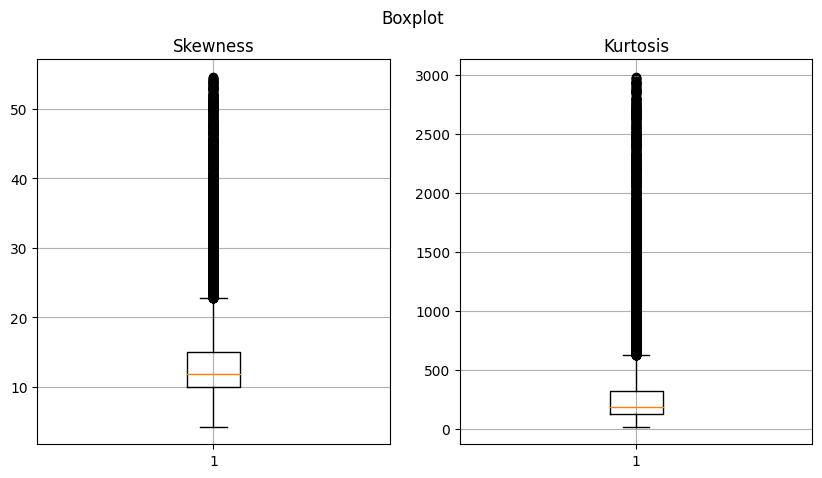

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle("Boxplot")
ax[0].boxplot(skewness_series)
ax[0].grid(True)
ax[0].set_title("Skewness")
ax[1].boxplot(kurtosis_series)
ax[1].grid(True)
ax[1].set_title("Kurtosis")
plt.show()

So we see that the distributions are highly non-normal, very skewed with heavy tails. Therefore we can be sure that data is not normal.

Now we would like to check if we can model our data as a Poisson or as a Negative binomial distribution (Gamma, in the continuous case).

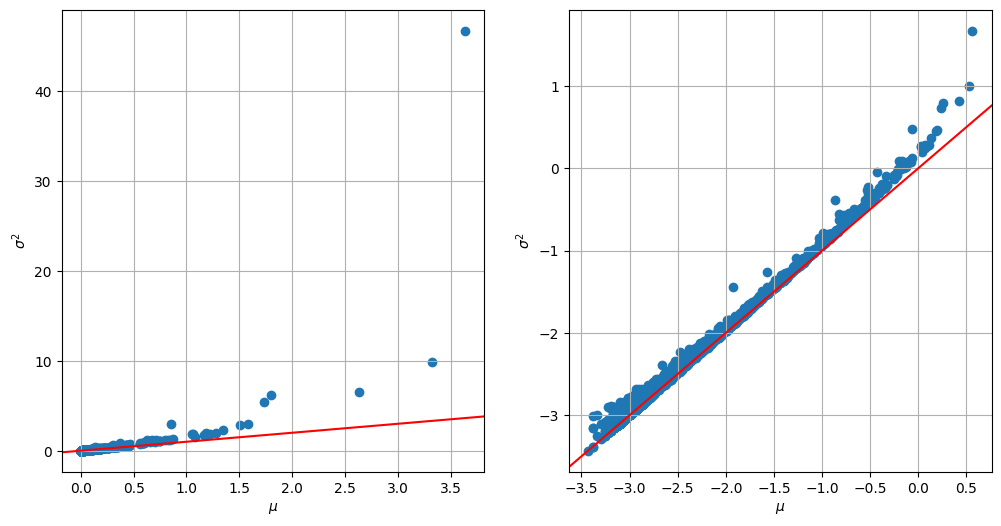

In [ ]:
m_train_var = m_train.var(axis = 1)
m_train_mean = m_train.mean(axis = 1)

fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].scatter(m_train_mean, m_train_var, label = "Data")
ax[0].set_xlabel("$\mu$")
ax[0].set_ylabel("$\sigma^2$")
ax[0].grid(True)
ax[0].axline((0,0), slope=1, color = 'r', label = "Variance = Mean")

ax[1].scatter(m_train_mean.apply(np.log10), m_train_var.apply(np.log10), label = "Data")
ax[1].set_xlabel("$\mu$")
ax[1].set_ylabel("$\sigma^2$")
ax[1].grid(True)
ax[1] = plt.gca() 
ax[1].axline((0,0), slope=1, color = 'r', label = "Variance = Mean")


plt.show()

Differently from the SmartSeq case, the scatter of the data points kind of falls on the diagonal $y=x$. Therefore, the Poisson distribution can be used to represent our data. 

Of course this analysis has been more heuristic than statistically significant, yet it serves for us as a step to further understand the data.



### Correlation

We now want to check correlation between samples and features. First we proceed at looking the correlation between samples.

In order to analyse correlation, 2 main measures are used:
- Pearson correlation coefficient. It is a bivariate correlation coefficient, that measures the linear correlation between two sets of data.
-  Spearman's rank correlation. It is a nonparametric measure of rank correlation. It assesses how well the relationship between two variables can be described using a monotonic function. So it assesses monotonic relationships.



Number of cells included:  (1000, 1000)
Average between minimum and maximum correlation:  0.49272467710631324
Average correlation of expression profiles between genes:  0.26583308782243453


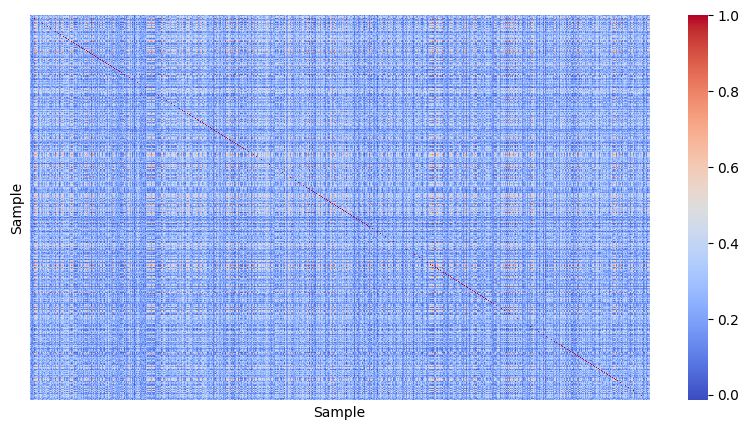

In [ ]:
random.seed(42)
random_columns = [i for i in range(0,m_train.shape[0])]
random.shuffle(random_columns)

corr_matrix_p = m_train.iloc[:, random_columns[:1000]].corr(method = 'pearson') #correlation matrix made of 250 random columns

average = (corr_matrix_p.values.max() - corr_matrix_p.values.min()) /2 + corr_matrix_p.values.min()
print("Number of cells included: ", np.shape(corr_matrix_p))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_p.mean().mean())

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_p, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()

Number of cells included:  (1000, 1000)
Average between minimum and maximum correlation:  0.49006245609607524
Average correlation of expression profiles between genes:  0.16224495018545051


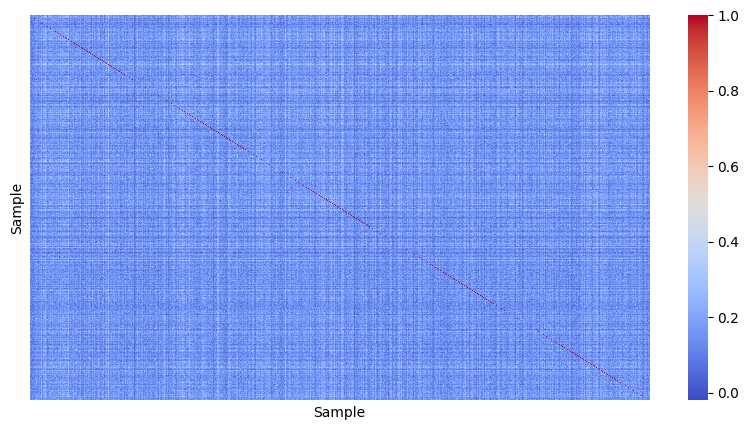

In [ ]:
corr_matrix_s = m_train.iloc[:, random_columns[:1000]].corr(method = 'spearman')

average = (corr_matrix_s.values.max() - corr_matrix_s.values.min()) /2 + corr_matrix_s.values.min()
print("Number of cells included: ", np.shape(corr_matrix_s))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_s.mean().mean())

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_s, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()

We see that most cells are only slightly positively correlated between each other. 
From the analysis before, we could think that most of this cells are problematic (e.g. dead). However, since the data is very sparse and since from the previous analysis we have seen that low correlated cells were not very expressed, we are more inclined to believe that the low correlation can be explained better by the fact that we have sparse data.

However, let's analyse it more closely. From now on, we are going to analyse the correlation using the Pearson correlation coefficient. 


First of all, we now can plot the distribution of the correlation between gene expression profiles using an histogram (we do it on the first five variables in order not to lose too much time). 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

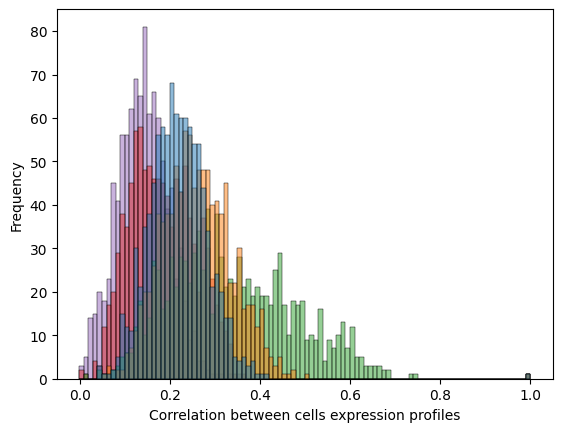

In [ ]:
c = corr_matrix_p

c_small=corr_matrix_p.iloc[:,:5]
sns.histplot(c_small,bins=100)
plt.legend().set_visible(False);
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')
plt.plot()

Differently from before, we see that the correlation between cells is much lower.

Now, we want to focus on the distribution of cells which have low correlation with all the others, in order to understand why this happens, and what are its properties.

First, we want to define cells that are not much correlated with others. We do so by saying that the average correlation with all the other cells is smaller than a threshold, than we define.

In [ ]:
correlation_threshold = 0.14

low_corr_cells = (corr_matrix_p.sum(axis = 0) / corr_matrix_p.shape[1] ) <= correlation_threshold
high_corr_cells = ((corr_matrix_p.sum(axis = 0) / corr_matrix_p.shape[1] ) > correlation_threshold) & ((corr_matrix_p.sum(axis = 0) / corr_matrix_p.shape[1] ) <= 0.38)
very_high_corr_cells = (corr_matrix_p.sum(axis = 0) / corr_matrix_p.shape[1] ) > 0.38

Notice that the correlation threshold used is much lower than before. This might mean that we will not find any significant difference between types of cells.

Now, let's analyse the distribution of the cells.

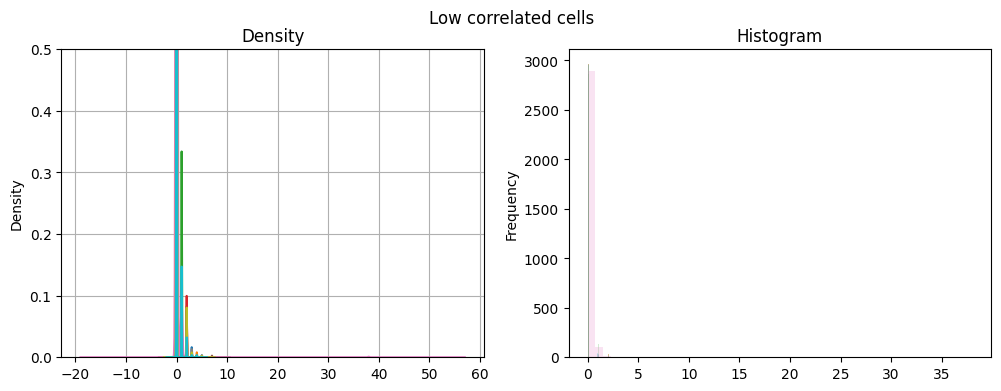

In [ ]:
low_corr = m_train.iloc[:, random_columns[:1000]].loc[:, low_corr_cells]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("Low correlated cells")
for s in low_corr.columns[:10]:
    low_corr[s].plot.density(legend = False, ax = ax[0])  
ax[0].grid(True)
ax[0].set_title("Density")
ax[0].set_ylim(0,0.5)
 
for s in low_corr.columns[:10]:
    ax[1].hist(low_corr[s], bins = 50, alpha = 0.2)
ax[1].set_ylabel("Frequency")
ax[1].set_title("Histogram")
plt.show()

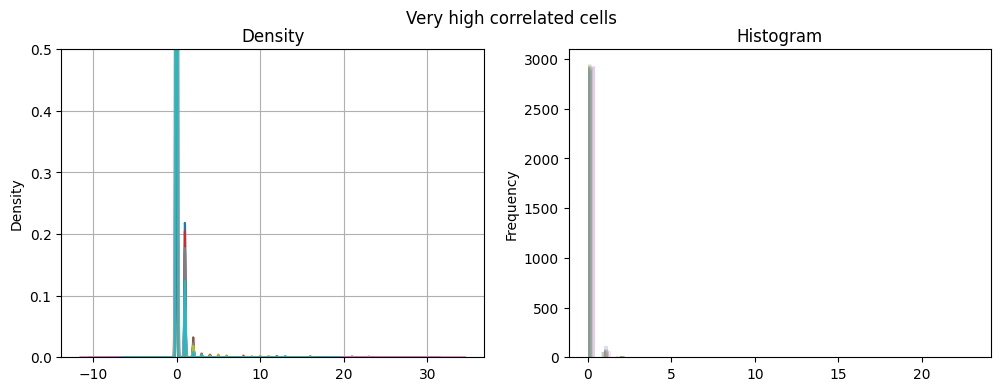

In [ ]:
very_high_corr = m_train.iloc[:, random_columns[:1000]].loc[:, very_high_corr_cells]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("Very high correlated cells")
for s in very_high_corr.columns[:10]:
    very_high_corr[s].plot.density(legend = False, ax = ax[0])  
ax[0].grid(True)
ax[0].set_title("Density")
ax[0].set_ylim(0,0.5)
 
for s in very_high_corr.columns[:10]:
    ax[1].hist(very_high_corr[s], bins = 50, alpha = 0.2)
ax[1].set_ylabel("Frequency")
ax[1].set_title("Histogram")
plt.show()

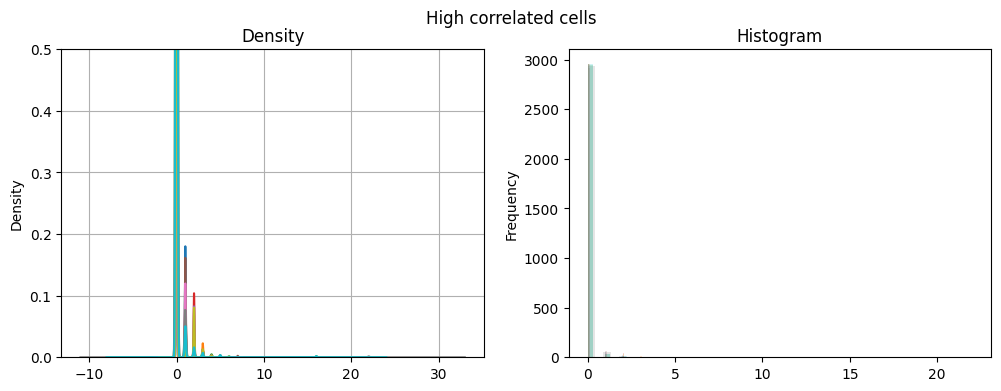

In [ ]:
high_corr =  m_train.iloc[:, random_columns[:1000]].loc[:, high_corr_cells]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("High correlated cells")
for s in high_corr.columns[:10]:
    high_corr[s].plot.density(legend = False, ax = ax[0])  
ax[0].grid(True)
ax[0].set_title("Density")
ax[0].set_ylim(0,0.5)
 
for s in high_corr.columns[:10]:
    ax[1].hist(high_corr[s], bins = 50, alpha = 0.2)
ax[1].set_ylabel("Frequency")
ax[1].set_title("Histogram")
plt.show()

From the distributions, we see that the distribution of all cells are mainly 0, so they are not very much expressed. 
The results cannot be interpreted very well due to this.
However, we can still try to see some statistics to see if there is a difference.

In [ ]:
print("Average expression low correlation: ", low_corr.mean().mean())
print("Average expression high correlation: ", high_corr.mean().mean())
print("Average expression very high correlation: ", very_high_corr.mean().mean())

Average expression low correlation:  0.02905128205128205
Average expression high correlation:  0.0341474622770919
Average expression very high correlation:  0.036888888888888895


In [ ]:
sparsity_index_low = 1 - (np.count_nonzero(low_corr.values) / low_corr.size)
sparsity_index_high = 1 - (np.count_nonzero(high_corr.values) / high_corr.size)
sparsity_index_very_high = 1 - (np.count_nonzero(very_high_corr.values) / very_high_corr.size)
print("Low correlation: ", sparsity_index_low)
print("High correlation: ", sparsity_index_high)
print("Very high correlation: ", sparsity_index_very_high)

Low correlation:  0.9806410256410256
High correlation:  0.9753542524005487
Very high correlation:  0.9736222222222222


Notice that all types of cells are very sparse and have a very low expression.

Now, we are interested in how hypoxic and normoxic cells relate with each other. So, we want to analyse, using the Pearson correlation coefficient, the correlation between hypoxic and normoxic cells between them.

Hypoxic:
Number of cells included:  (500, 500)
Average between minimum and maximum correlation:  0.49740145504332645
Average correlation of expression profiles between genes:  0.3880578382153733
Min. correlation of expression profiles between cells:  -0.005197089913347129
Normoxic:
Number of cells included:  (500, 500)
Average between minimum and maximum correlation:  0.4925658484534587
Average correlation of expression profiles between genes:  0.28582311034524716
Min. correlation of expression profiles between cells:  -0.014868303093082704
Mixed:
Number of cells included:  (250, 250)
Average between minimum and maximum correlation:  0.4741435469572775
Average correlation of expression profiles between genes:  0.2603843485147638
Min. correlation of expression profiles between cells:  -0.00449090678600675


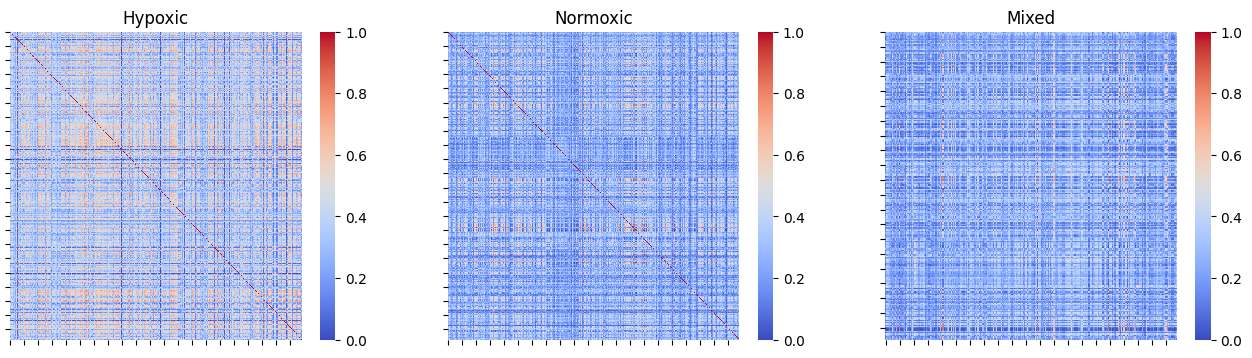

In [ ]:
normoxic_cells = m_train.columns[m_train.columns.str.contains('Normoxia')].tolist()[:500]
hypoxic_cells = m_train.columns[m_train.columns.str.contains('Hypoxia')].tolist()[:500]

corr_matrix_hypoxic = m_train.loc[:, hypoxic_cells].corr(method = 'pearson')
corr_matrix_hypoxic
print("Hypoxic:")
average = (corr_matrix_hypoxic.values.max() - corr_matrix_hypoxic.values.min()) /2 + corr_matrix_hypoxic.values.min()
print("Number of cells included: ", np.shape(corr_matrix_hypoxic))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_hypoxic.mean().mean())
print("Min. correlation of expression profiles between cells: ", corr_matrix_hypoxic.values.min())

corr_matrix_normoxic = m_train.loc[:, normoxic_cells].corr(method = 'pearson')
corr_matrix_normoxic
print("Normoxic:")
average = (corr_matrix_normoxic.values.max() - corr_matrix_normoxic.values.min()) /2 + corr_matrix_normoxic.values.min()
print("Number of cells included: ", np.shape(corr_matrix_normoxic))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_normoxic.mean().mean())
print("Min. correlation of expression profiles between cells: ", corr_matrix_normoxic.values.min())

#correlation matrix between mixed cells
hy_no_cells = hypoxic_cells[:500].copy()
for i in normoxic_cells[:500]:
  hy_no_cells.append(i)

corr_matrix_mixed = m_train.loc[:, hy_no_cells].corr(method = 'pearson').loc[normoxic_cells[:250], hypoxic_cells[:250]]
corr_matrix_mixed
print("Mixed:")
average = (corr_matrix_mixed.values.max() - corr_matrix_mixed.values.min()) /2 + corr_matrix_mixed.values.min()
print("Number of cells included: ", np.shape(corr_matrix_mixed))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_mixed.mean().mean())
print("Min. correlation of expression profiles between cells: ", corr_matrix_mixed.values.min())

fig, ax =plt.subplots(1,3, figsize = (16,4))

sns.heatmap(corr_matrix_hypoxic, cmap='coolwarm', ax=ax[0], vmin=0, vmax=1)
ax[0].set(title='Hypoxic', xticklabels=[], yticklabels=[])

sns.heatmap(corr_matrix_normoxic, cmap='coolwarm', ax=ax[1], vmin=0, vmax=1)
ax[1].set(title='Normoxic', xticklabels=[], yticklabels=[])

sns.heatmap(corr_matrix_mixed, cmap='coolwarm', ax=ax[2], vmin=0, vmax=1)
ax[2].set(title='Mixed', xticklabels=[], yticklabels=[])

plt.show()


Notice that hypoxic cells seems to be more correlated between them than normoxic cells.

Now we are interested in the analysis of the correlation of genes. Let's first use again Pearson and Spearman correlation coefficients.

Number of cells included:  (300, 300)
Average between minimum and maximum correlation:  0.3879168116112196
Average correlation of expression profiles between genes:  0.004240133324097565
Min. correlation of expression profiles between genes:  -0.22416637677756066


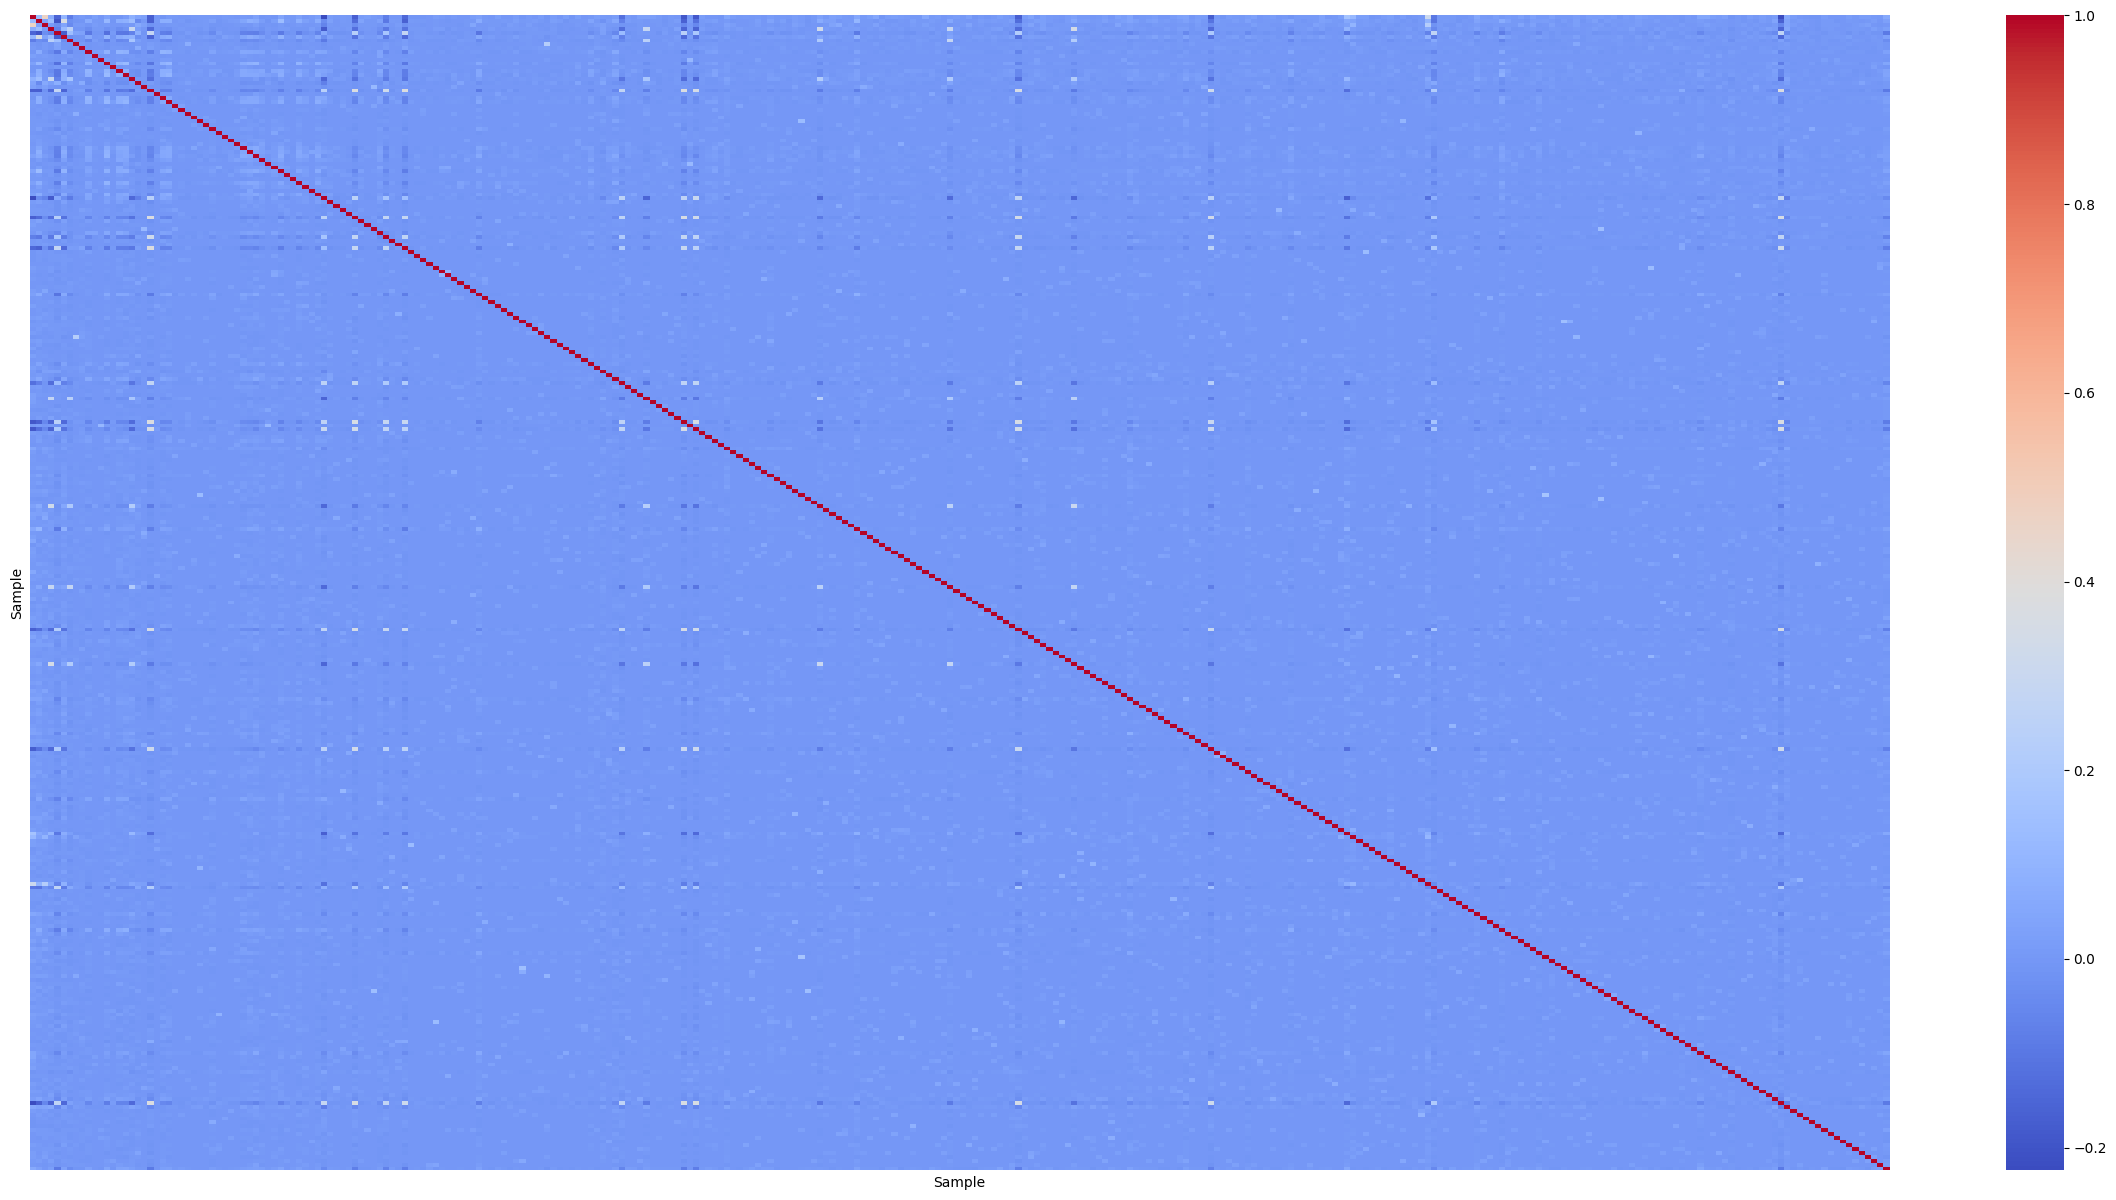

In [ ]:
corr_matrix_p = m_train[:300].transpose().corr(method = 'pearson')

average = (corr_matrix_p.values.max() - corr_matrix_p.values.min()) /2 + corr_matrix_p.values.min()
print("Number of cells included: ", np.shape(corr_matrix_p))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_p.mean().mean())
print("Min. correlation of expression profiles between genes: ", corr_matrix_p.values.min())

plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix_p, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()


Number of cells included:  (300, 300)
Average between minimum and maximum correlation:  0.33112893137935623
Average correlation of expression profiles between genes:  0.0047381857783473594
Min. correlation of expression profiles between genes:  -0.3377421372412876


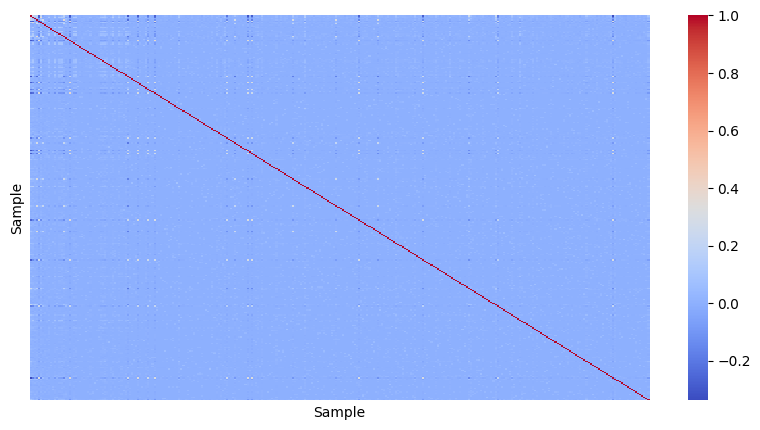

In [ ]:
corr_matrix_s = m_train[:300].transpose().corr(method = 'spearman')

average = (corr_matrix_s.values.max() - corr_matrix_s.values.min()) /2 + corr_matrix_s.values.min()
print("Number of cells included: ", np.shape(corr_matrix_s))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_s.mean().mean())
print("Min. correlation of expression profiles between genes: ", corr_matrix_s.values.min())

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_s, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()

Notice that for both correlation coefficients, most of the genes don't seem to be correlated.

# **QC and Dimensionality Reduction**

In [ ]:
train = pd.read_csv(path_m_filtered_norm_train, sep = " ")


## **QC for Cells**

As before, we want first to clean the dataframe, due to the high number of cells.

In [ ]:
def show_indicators(df_given, counts_per_cell, counts_per_cell_threshold, number_of_genes, number_of_genes_threshold, mitochondrial_ratio, mitochondrial_threshold):
  fig, ax = plt.subplots(3, 1, figsize = (10, 15))

  ax[0].set_title("Number of counts per cell")
  ax[0].hist(counts_per_cell, bins = 60)
  ax[0].axvline(counts_per_cell_threshold, color = "r")
  ax[0].set_xlabel("Counts per cell")
  ax[0].set_ylabel("Number of cells")
  ax[0].grid(True)
  ax[1].set_title("Number of detected genes per cell")
  ax[1].hist(number_of_genes, bins = 60)
  ax[1].axvline(number_of_genes_threshold, color = "r")
  ax[1].set_xlabel("Number of genes")
  ax[1].set_ylabel("Number of cells")
  ax[1].grid(True)
  ax[2].set_title("Mitochondrial ratio per cell")
  ax[2].hist(mitochondrial_ratio, bins = 60)
  ax[2].axvline(mitochondrial_threshold, color = "r")
  ax[2].set_xlabel("Mitochondrial Ratio")
  ax[2].set_ylabel("Number of cells")
  ax[2].grid(True)

  plt.show()

In [ ]:
def removing_cells(df_given, counts_per_cell_threshold, number_of_genes_threshold, mitochondrial_threshold):
  """
  This function removes low-quality cells, based on three covariates:
  -Number of counts per cell
  -Number of detected genes per cell
  -Fraction of mitchondrial genes count per cell
  We are going to consider them together
  """

  counts_per_cell = df_given.sum(axis = 0) 
  number_of_genes = np.count_nonzero(df_given, axis=0) 
  mitochondrial_genes = df_given.index.str.startswith("MT-")
  mitochondrial_threshold = 0.05
  mitochondrial_ratio = df_given.loc[mitochondrial_genes, :].sum() / counts_per_cell
  
  show_indicators(df_given, counts_per_cell, counts_per_cell_threshold, number_of_genes, number_of_genes_threshold, mitochondrial_ratio, mitochondrial_threshold)

  df_modified = df_given.loc[:, (mitochondrial_ratio < mitochondrial_threshold) & (number_of_genes > number_of_genes_threshold) & (counts_per_cell > counts_per_cell_threshold)]
  return df_modified

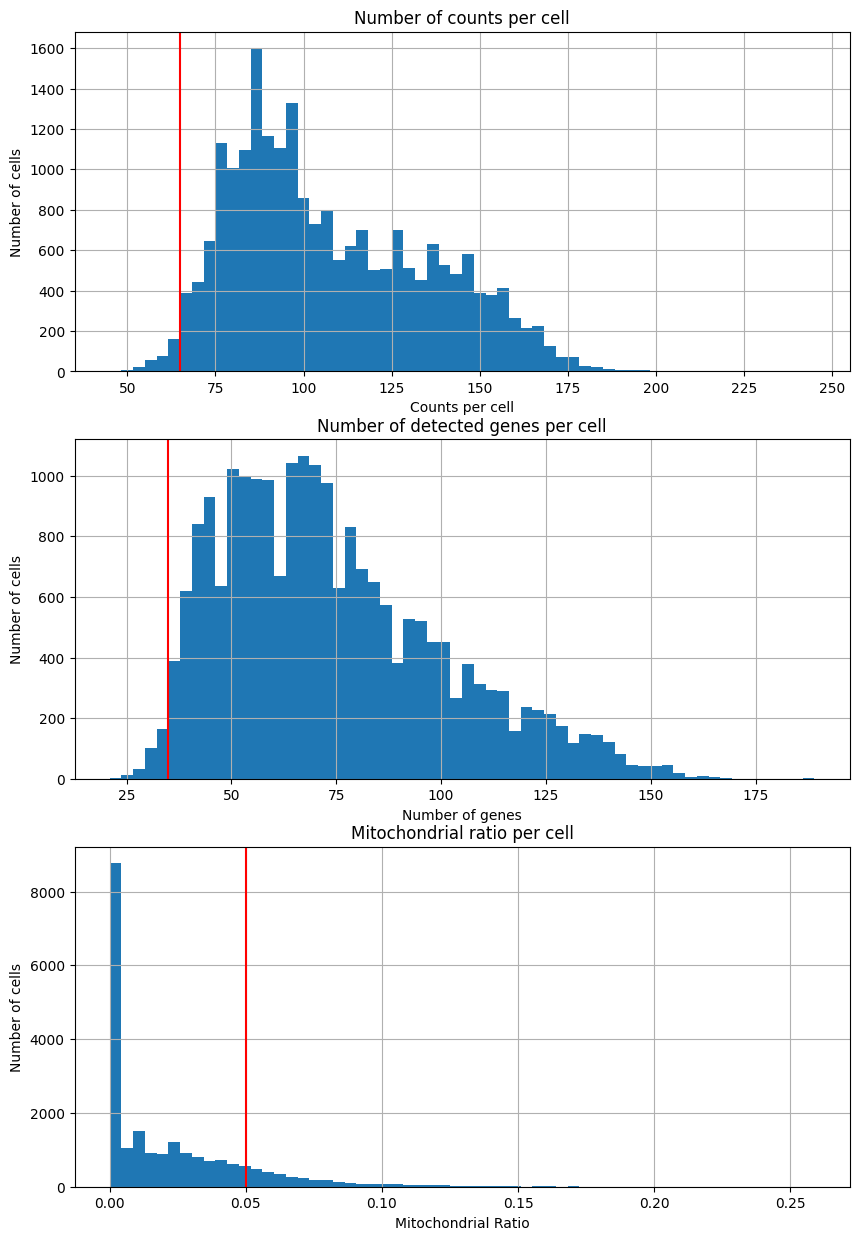

(3000, 17810)

In [ ]:
cpc_threshold = 65
no_genes_threshold = 35
mit_threshold = 0.05

reduced_train = removing_cells(train, cpc_threshold, no_genes_threshold, mit_threshold)
reduced_train.shape

Notice that there is a huge discrepancy between the threshold using in DropSeq and SmartSeq. However, this can be explained by the low efficiency of DropSeq. 

In [ ]:
train = reduced_train

## **PCA to visualize the data**

Now that we have the new reduced dataset, we can try and perform training. We will check how accuracy changes with different dimensions (using PCA).

In [ ]:
train = train.T

In [ ]:
train_label = np.array(train.index.map(lambda x: "Normoxia" if "Normoxia" in x else "Hypoxia"))
train_label.shape

(17810,)

In [ ]:
train.isna().sum().sum()

0

We see that there are no missing values.

In [ ]:
train_scaled = pd.DataFrame(StandardScaler().fit_transform(train), columns=train.columns)

In [ ]:
complete_train = train.copy()
complete_train['Label'] = train_label
complete_train

MALAT1  MT-RNR2  NEAT1  H1-5  TFF1  MT-RNR1  H4C3  \
AAAAACCTATCG_Normoxia       1        0      0     0     4        0     0   
AAAACAACCCTA_Normoxia       3        0      0     0     1        0     1   
AAAACACTCTCA_Normoxia       3        0      0     0     1        0     0   
AAAACCTAGCTC_Normoxia       4        0      0     0     0        0     0   
AAAACCTCCGGG_Normoxia       5        0      2     2     0        0     0   
...                       ...      ...    ...   ...   ...      ...   ...   
TTTTCGCGTAGA_Hypoxia        0        0      0     0     3        0     7   
TTTTCGTCCGCT_Hypoxia        1        0      0     0     4        0     1   
TTTTCTCCGGCT_Hypoxia        0        0      0     1     2        0     4   
TTTTGTTCAAAG_Hypoxia        0        0      0     0     6        0     0   
TTTTTTGTATGT_Hypoxia        4        0      0     0     0        0     6   

                       GDF15  KRT81  MT-CO3  ...  SKIDA1  MICALL1  RARG  \
AAAAACCTATCG_Normoxia      0      0       0  ...       0        0     0   
AAAACAACCCTA_Normoxia      0      0       0  ...       0        0     0   
AAAACACTCTCA_Normoxia      0      0       0  ...       0        0     0   
AAAACCTAGCTC_Normoxia      0      0       1  ...       0        0     0   
AAAACCTCCGGG_Normoxia      0      0       0  ...       0        0     0   
...                      ...    ...     ...  ...     ...      ...   ...   
TTTTCGCGTAGA_Hypoxia       0      0       0  ...       0        0     0   
TTTTCGTCCGCT_Hypoxia       0      1       0  ...       0        0     0   
TTTTCTCCGGCT_Hypoxia       0      0       0  ...       0        0     0   
TTTTGTTCAAAG_Hypoxia       0      0       0  ...       0        0     0   
TTTTTTGTATGT_Hypoxia       0      0       0  ...       0        0     0   

                       MYO1F  BRWD1-AS2  RPS19BP1  AUNIP  TNK2  SUDS3  \
AAAAACCTATCG_Normoxia      0          0         0      0     0      0   
AAAACAACCCTA_Normoxia      0          0         0      0     0      0   
AAAACACTCTCA_Normoxia      0          0         0      0     0      0   
AAAACCTAGCTC_Normoxia      0          0         0      0     0      0   
AAAACCTCCGGG_Normoxia      0          0         0      0     0      0   
...                      ...        ...       ...    ...   ...    ...   
TTTTCGCGTAGA_Hypoxia       0          0         0      0     0      0   
TTTTCGTCCGCT_Hypoxia       0          0         0      0     0      0   
TTTTCTCCGGCT_Hypoxia       0          0         0      0     0      1   
TTTTGTTCAAAG_Hypoxia       0          0         0      0     0      0   
TTTTTTGTATGT_Hypoxia       0          0         0      0     0      0   

                          Label  
AAAAACCTATCG_Normoxia  Normoxia  
AAAACAACCCTA_Normoxia  Normoxia  
AAAACACTCTCA_Normoxia  Normoxia  
AAAACCTAGCTC_Normoxia  Normoxia  
AAAACCTCCGGG_Normoxia  Normoxia  
...                         ...  
TTTTCGCGTAGA_Hypoxia    Hypoxia  
TTTTCGTCCGCT_Hypoxia    Hypoxia  
TTTTCTCCGGCT_Hypoxia    Hypoxia  
TTTTGTTCAAAG_Hypoxia    Hypoxia  
TTTTTTGTATGT_Hypoxia    Hypoxia  

[17810 rows x 3001 columns]

In [ ]:
pca = PCA()

In [ ]:
colors1 = train.sum(axis=1)
cmap = {'Hypoxia': 'red', 'Normoxia': 'blue'}
colors2 = [cmap[cell_type] for cell_type in complete_train.Label]


def plot_dim_red(dim_type, df, ax1, ax2, ax3):
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17.5, 11))

  plt.suptitle(f"{dim_type} Visualization")

  # counts per cell - 2D
  sctr2d = axs[0, 0].scatter(df[:, 0], df[:, 1], c=colors1)
  axs[0, 0].set_xlabel(ax1)
  axs[0, 0].set_ylabel(ax2)
  axs[0, 0].grid(True)
  if dim_type == "PCA":
    axs[0, 0].set_title(f"Explained Variance:{round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1], 2)}")

  # counts per cell - 3D
  axs[0, 1].remove()
  axs[0, 1] = fig.add_subplot(222, projection='3d')
  sctr3d = axs[0, 1].scatter(df[:, 0], df[:, 1], df[:, 2], c=colors1)
  axs[0, 1].set_xlabel(ax1)
  axs[0, 1].set_ylabel(ax2)
  axs[0, 1].set_zlabel(ax3)
  if dim_type == "PCA":
    axs[0, 1].set_title(f"Explained Variance:{round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2], 2)}")
  fig.colorbar(sctr3d, ax=axs[0, 1], label="Counts per cell")

  # hypoxia normoxia - 2D
  sctr2d = axs[1, 0].scatter(df[:, 0], df[:, 1], c=colors2)
  axs[1, 0].set_xlabel(ax1)
  axs[1, 0].set_ylabel(ax2)
  axs[1, 0].grid(True)
  handles = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=val, label=key)[0] for key, val in cmap.items()]
  axs[1, 0].legend(handles=handles, numpoints=1, loc='lower right')

  # hypoxia normoxia - 3D
  axs[1, 1].remove()
  axs[1, 1] = fig.add_subplot(224, projection='3d')
  sctr3d = axs[1, 1].scatter(df[:, 0], df[:, 1], df[:, 2], c=colors2)
  axs[1, 1].set_xlabel(ax1)
  axs[1, 1].set_ylabel(ax2)
  axs[1, 1].set_zlabel(ax3)

  plt.tight_layout()

In [ ]:
train_pca = pca.fit_transform(train_scaled)

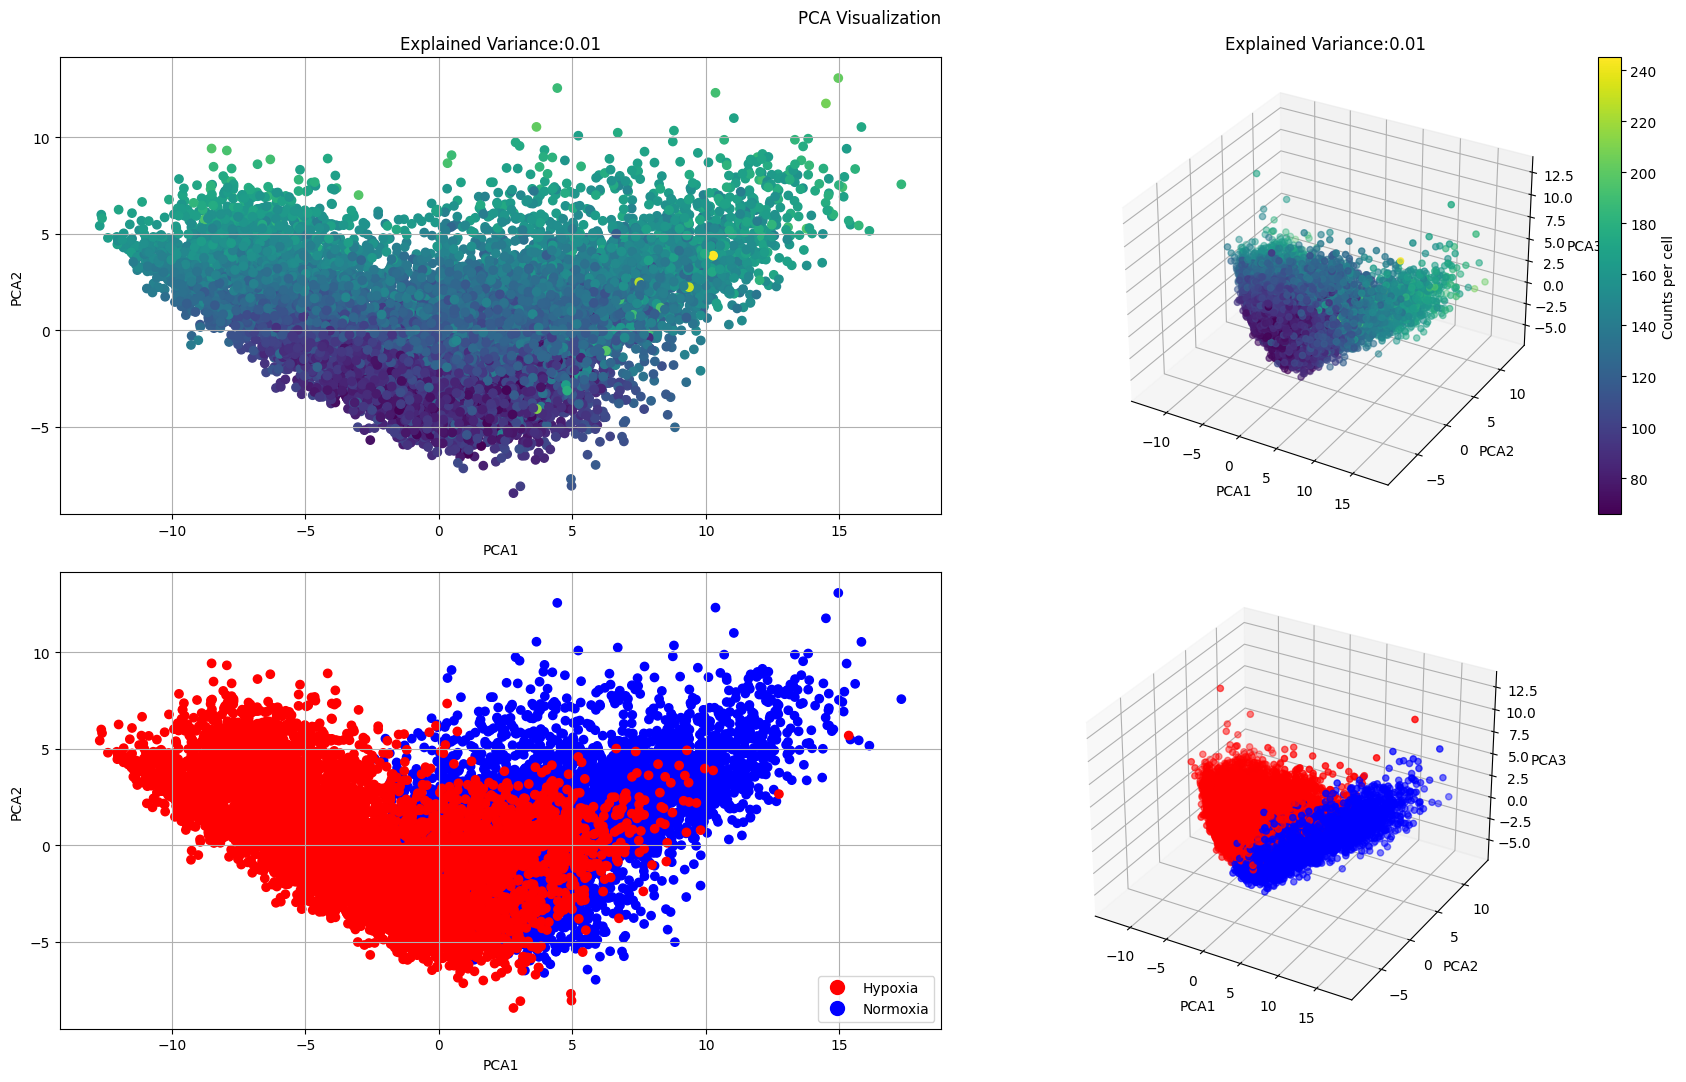

In [ ]:
plot_dim_red("PCA", train_pca, "PCA1", "PCA2", "PCA3")
plt.show()

We can clearly see that the 

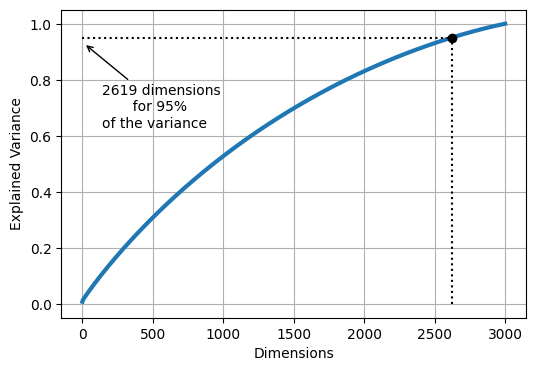

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(f"{d} dimensions\n       for 95%\nof the variance", xy=(10, 0.93), xytext=(140, 0.63),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

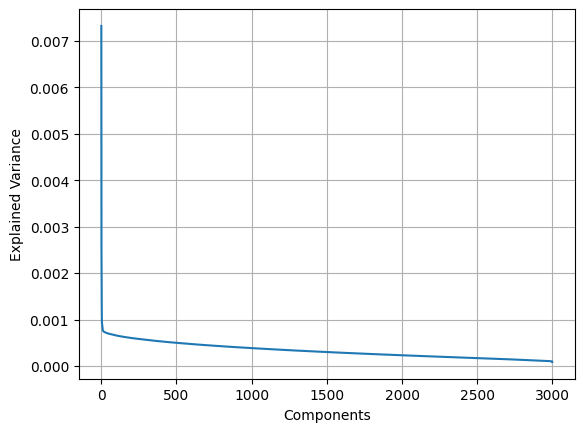

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Explained Variance")
plt.xlabel("Components")
plt.grid(True)
plt.show()

# **Unsupervised Training: Clustering**

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,21), timings= True, random_state=42)
visualizer.fit(train_scaled)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


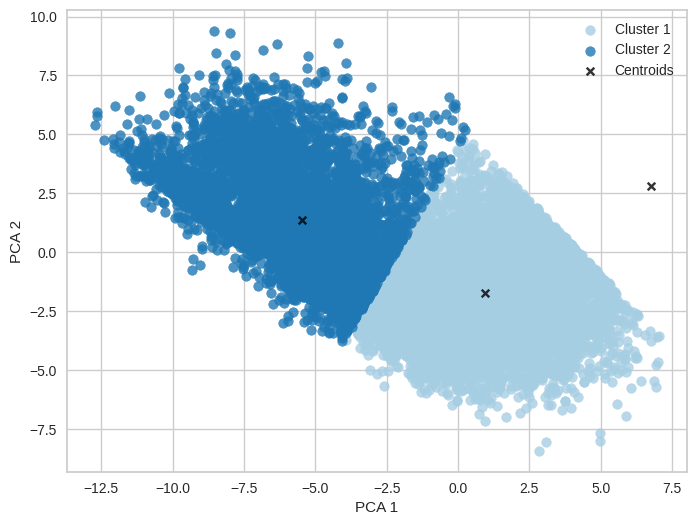

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

pca = PCA(n_components=2)

PCA_components = pca.fit_transform(train_scaled)

kmeans.fit(PCA_components)

cluster_labels = kmeans.predict(PCA_components)

centroids = kmeans.cluster_centers_
train_scaled['cluster'] = cluster_labels

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("Paired", n_colors=2)

for i in range(2):
    ax.scatter(PCA_components[train_scaled['cluster']==i, 0], PCA_components[train_scaled['cluster']==i, 1], alpha=0.8, label='Cluster '+str(i+1), color=colors[i])

ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=30, color='black', alpha = 0.8, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
ax.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


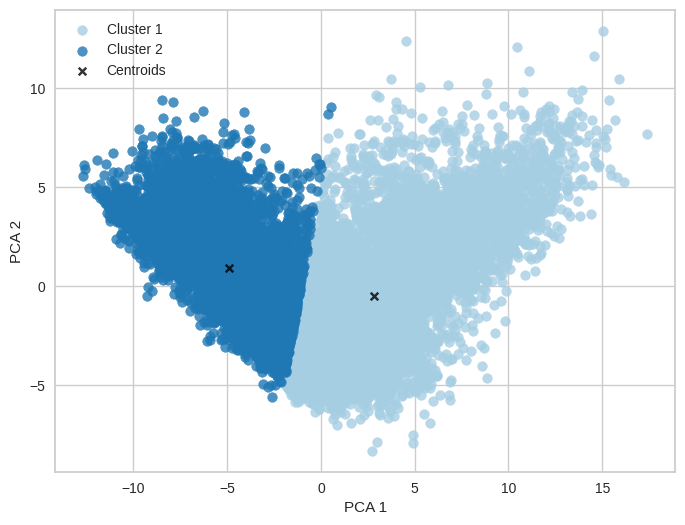

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)

pca = PCA(n_components=2)

PCA_components = pca.fit_transform(train_scaled)

kmeans.fit(PCA_components)

cluster_labels = kmeans.predict(PCA_components)

centroids = kmeans.cluster_centers_
train_scaled['cluster'] = cluster_labels

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("Paired", n_colors=2)

for i in range(2):
    ax.scatter(PCA_components[train_scaled['cluster']==i, 0], PCA_components[train_scaled['cluster']==i, 1], alpha=0.8, label='Cluster '+str(i+1), color=colors[i])

ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=30, color='black', alpha = 0.8, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
ax.legend()
plt.show()


# **Supervised Training**

Our first idea was to try on this dataset the same models we ran on SmartSeq dataframes, i.e. "Dummy", "SDG", "Logistic", "Random Forest", "SVM", "Linear SVM", "KNN", "Gaussian NB". However, due to the large dimensions of this data, we figured that we don't have enough computational power to do so. So, we decided to first try to apply only a few methods, namely "Dummy", "SDG", "Logistic" and "Random Forest", on the dataframe, then to apply all the methods mentioned above on a reduced version of our dataframe, after running PCA with only 250 dimensions. 

In [ ]:
model_pipline = []
model_pipeline = []
model_pipeline.append(DummyClassifier())
model_pipeline.append(SGDClassifier(loss ="log_loss", penalty="l2", alpha=1000,
                                     random_state=123, learning_rate="adaptive", eta0=1))
model_pipeline.append(LogisticRegression(penalty="l1", C=0.01, solver="liblinear"))
model_pipeline.append(RandomForestClassifier(random_state=42))

In [ ]:
model_index = ["Dummy", "SDG", "Logistic", "Random Forest"] 

We only try these models because otherwise, given the dimensions of our dataframe, it takes to long to run the following cells.

In [ ]:
acc_list = []
cm_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []

auc_list = []
imp_list = []


for model in model_pipeline:

  scores, auc_val = 0, 0

  model.fit(train, train_label)
  acc_list.append(cross_val_score(model, train, train_label, scoring="accuracy", cv=10).mean().round(3))

  label_pred = cross_val_predict(model, train, train_label, cv=10)
  cm_list.append(confusion_matrix(train_label, label_pred))

  prec_list_n.append(precision_score(train_label, label_pred, pos_label="Normoxia").round(3))
  rec_list_n.append(recall_score(train_label, label_pred, pos_label="Normoxia").round(3))
  f1_list_n.append(f1_score(train_label, label_pred, pos_label="Normoxia").round(3))

  if isinstance(model, DummyClassifier):
    auc_val = None
    coef = None
  elif isinstance(model, (RandomForestClassifier, KNeighborsClassifier, GaussianNB)):
    scores = cross_val_predict(model, train, train_label, cv=10, method="predict_proba")[:, 1]
    auc_val = roc_auc_score(train_label, scores).round(3)

    if isinstance(model, RandomForestClassifier):
      coef = np.array(model.feature_importances_).ravel()
    else:
      coef = None

  else:
    scores = cross_val_predict(model, train, train_label, cv=10, method='decision_function')
    auc_val = roc_auc_score(train_label, scores).round(3)
    coef = np.array(model.coef_).ravel()

  auc_list.append(auc_val)

  importance = {}
  features = np.array(train.columns)
  if coef is not None:
    for i, c in enumerate(coef):
      importance[features[i]] = c

    largest_items = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:30]
    largest_keys = [item[0] for item in largest_items]
    largest_values = [item[1] for item in largest_items]

    largest = {largest_keys[i]:largest_values[i] for i in range(len(largest_keys))}
    largest = {k:v for k, v in largest.items() if v != 0}

    imp_list.append(largest)
  else:
    imp_list.append(None)


  print(f"{model} evaluation completed!")

print("\nAll models have been evaluated!")

DummyClassifier() evaluation completed!
SGDClassifier(alpha=1000, eta0=1, learning_rate='adaptive', loss='log_loss',
              random_state=123) evaluation completed!
LogisticRegression(C=0.01, penalty='l1', solver='liblinear') evaluation completed!
RandomForestClassifier(random_state=42) evaluation completed!

All models have been evaluated!


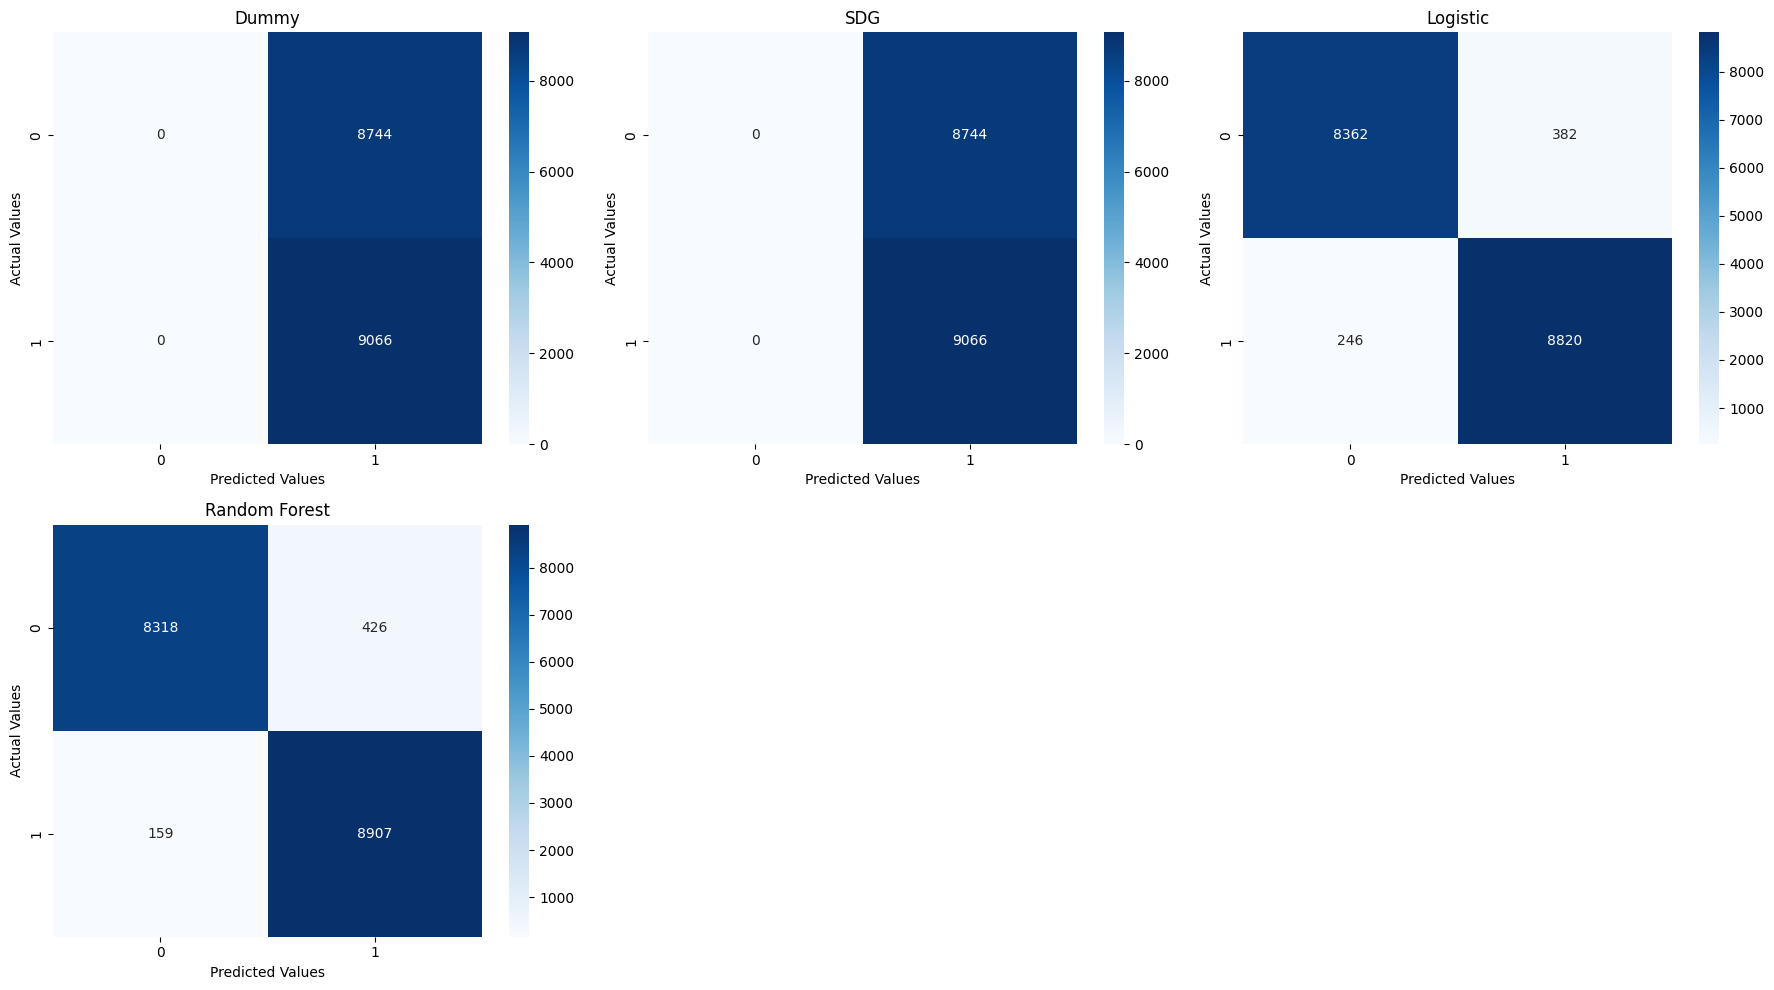

In [ ]:
fig = plt.figure(figsize=(18, 10))

num_plots = len(cm_list)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

for i in range(num_plots):
    cm, model = cm_list[i], model_index[i]
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    ax.set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', ax=ax)
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame({"Model":model_index, "Accuracy": acc_list, "Precision (Normoxia)": prec_list_n,
                           "Recall (Normoxia)": rec_list_n, "F1 (Normoxia)": f1_list_n, "Auc": auc_list})
results_df

Model  Accuracy  Precision (Normoxia)  Recall (Normoxia)  \
0          Dummy     0.509                 0.509              1.000   
1            SDG     0.509                 0.509              1.000   
2       Logistic     0.965                 0.958              0.973   
3  Random Forest     0.967                 0.954              0.982   

   F1 (Normoxia)    Auc  
0          0.675    NaN  
1          0.675  0.901  
2          0.966  0.994  
3          0.968  0.994

We see that the best model in the original dataset is Random Forest. Notice that we cannot conclude which model is the best one, because we don't have all the models at our disposal due to the large dimensions of our dataset.

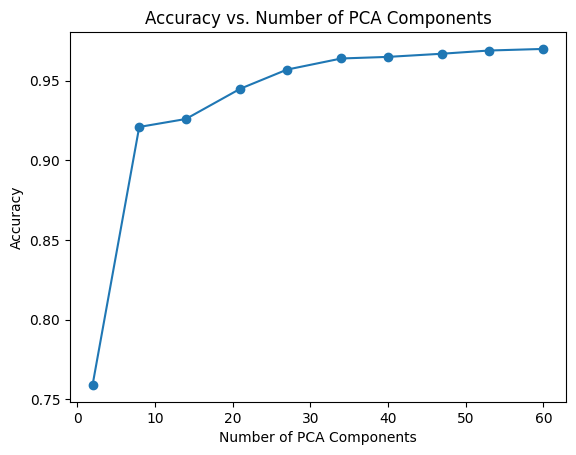

In [ ]:
n_components = np.linspace(2, 60, 10).astype(int)

accuracies_logi = []

for n in n_components:
    pca = PCA(n_components=n)
    train_transformed = pca.fit_transform(train)

    logi = LogisticRegression(solver='liblinear')
    logi.fit(train_transformed, train_label)

    accuracies_logi.append(cross_val_score(logi, train_transformed, train_label, scoring="accuracy", cv=10).mean().round(3))

plt.plot(n_components, accuracies_logi, 'o-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of PCA Components')
plt.show()

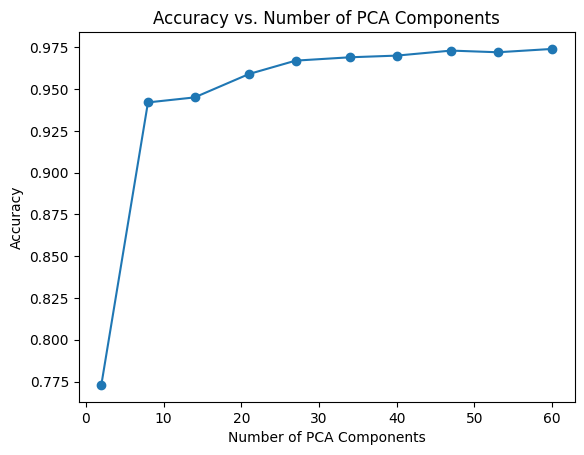

In [ ]:
n_components = np.linspace(2, 60, 10).astype(int)

accuracies_svm = []

for n in n_components:
    pca = PCA(n_components=n)
    train_transformed = pca.fit_transform(train)

    svm = SVC()
    svm.fit(train_transformed, train_label)

    accuracies_svm.append(cross_val_score(svm, train_transformed, train_label, scoring="accuracy", cv=10).mean().round(3))

plt.plot(n_components, accuracies_svm, 'o-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of PCA Components')
plt.show()

In [ ]:
np.argmax(accuracies_svm)

9

In [ ]:
n_components[5]

34

In [ ]:
n_components[6]

40

Now we'll actually deal with the reduced dataset.

In [ ]:
model_pipline = []
model_pipeline = []
model_pipeline.append(DummyClassifier())
model_pipeline.append(SGDClassifier(loss ="log_loss", penalty="l2", alpha=1000,
                                     random_state=123, learning_rate="adaptive", eta0=1))
model_pipeline.append(LogisticRegression(penalty="l1", C=0.01, solver="liblinear"))
model_pipeline.append(RandomForestClassifier(random_state=42))
model_pipeline.append(SVC(kernel='linear'))
model_pipeline.append(LinearSVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())

In [ ]:
model_index = ["Dummy", "SDG", "Logistic", "Random Forest", "SVM", "Linear SVM", "KNN", "Gaussian NB"]

In [ ]:
train_label_pca = np.array(train.index.map(lambda x: "Normoxia" if "Normoxia" in x else "Hypoxia"))

In [ ]:
pca = PCA(n_components=250)

In [ ]:
train_pca = pd.DataFrame(pca.fit_transform(train), index=train.index)

In [ ]:
acc_list = []
cm_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []

auc_list = []
imp_list = []


for model in model_pipeline:

  scores, auc_val = 0, 0

  model.fit(train_pca, train_label_pca)
  acc_list.append(cross_val_score(model, train_pca, train_label_pca, scoring="accuracy", cv=10).mean().round(3))

  label_pred = cross_val_predict(model, train_pca, train_label_pca, cv=10)
  cm_list.append(confusion_matrix(train_label_pca, label_pred))

  prec_list_n.append(precision_score(train_label_pca, label_pred, pos_label="Normoxia").round(3))
  rec_list_n.append(recall_score(train_label_pca, label_pred, pos_label="Normoxia").round(3))
  f1_list_n.append(f1_score(train_label_pca, label_pred, pos_label="Normoxia").round(3))

  if isinstance(model, DummyClassifier):
    auc_val = None
    coef = None
  elif isinstance(model, (RandomForestClassifier, KNeighborsClassifier, GaussianNB)):
    scores = cross_val_predict(model, train_pca, train_label_pca, cv=10, method="predict_proba")[:, 1]
    auc_val = roc_auc_score(train_label_pca, scores).round(3)

    if isinstance(model, RandomForestClassifier):
      coef = np.array(model.feature_importances_).ravel()
    else:
      coef = None

  else:
    scores = cross_val_predict(model, train_pca, train_label_pca, cv=10, method='decision_function')
    auc_val = roc_auc_score(train_label_pca, scores).round(3)
    coef = np.array(model.coef_).ravel()

  auc_list.append(auc_val)

  importance = {}
  features = np.array(train_pca.columns)
  if coef is not None:
    for i, c in enumerate(coef):
      importance[features[i]] = c

    largest_items = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:30]
    largest_keys = [item[0] for item in largest_items]
    largest_values = [item[1] for item in largest_items]

    largest = {largest_keys[i]:largest_values[i] for i in range(len(largest_keys))}
    largest = {k:v for k, v in largest.items() if v != 0}

    imp_list.append(largest)
  else:
    imp_list.append(None)


  print(f"{model} evaluation completed!")

print("\nAll models have been evaluated!")


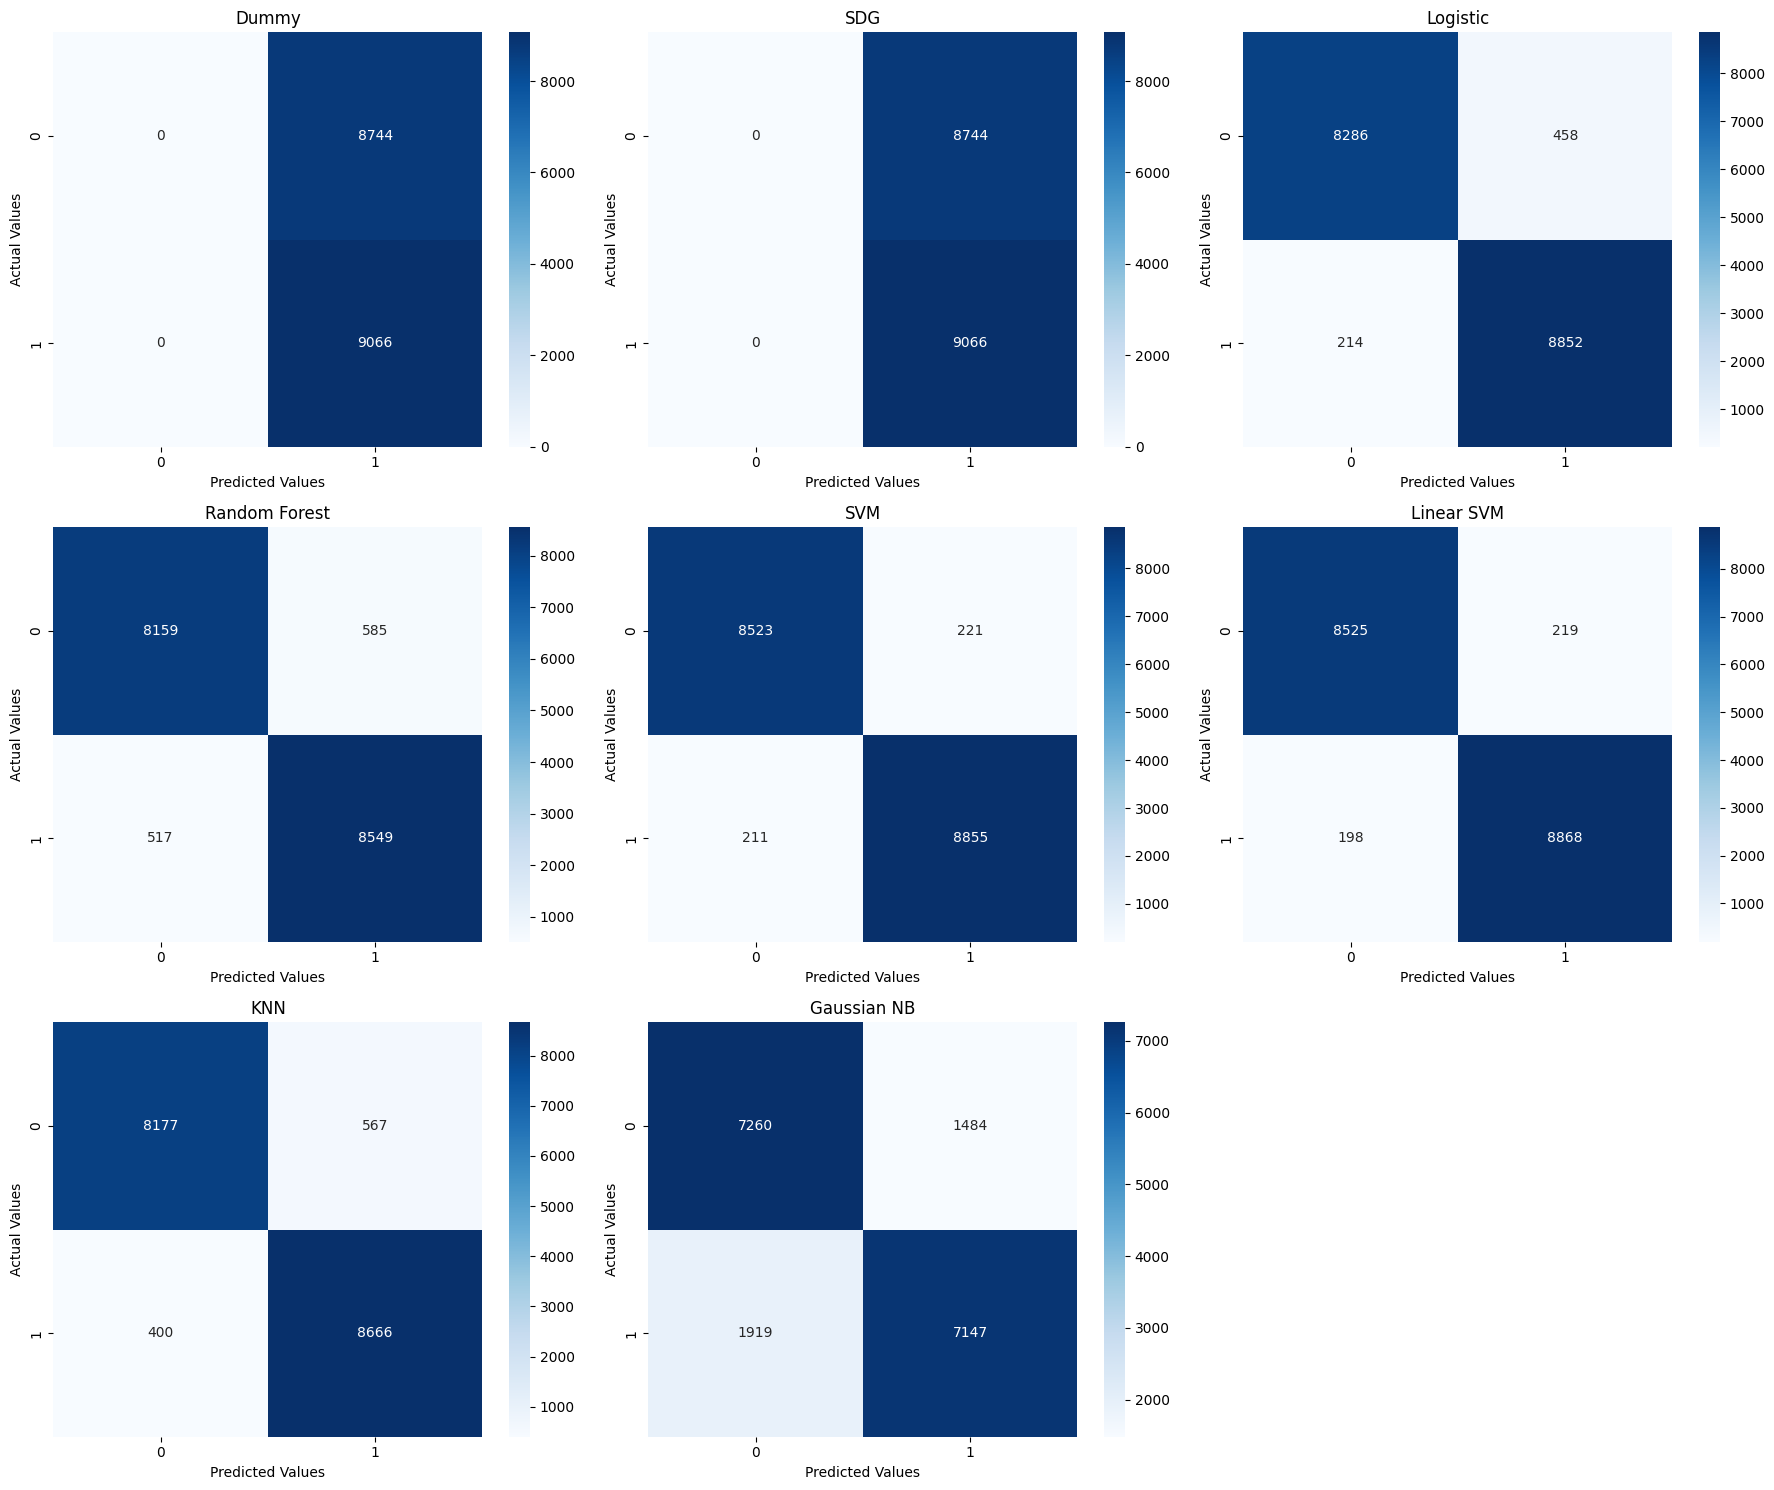

In [ ]:
fig = plt.figure(figsize=(18, 15))

num_plots = len(cm_list)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

for i in range(num_plots):
    cm, model = cm_list[i], model_index[i]
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    ax.set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', ax=ax)
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame({"Model":model_index, "Accuracy": acc_list, "Precision (Normoxia)": prec_list_n,
                           "Recall (Normoxia)": rec_list_n, "F1 (Normoxia)": f1_list_n, "Auc": auc_list})
results_df

Model  Accuracy  Precision (Normoxia)  Recall (Normoxia)  \
0          Dummy     0.509                 0.509              1.000   
1            SDG     0.509                 0.509              1.000   
2       Logistic     0.962                 0.951              0.976   
3  Random Forest     0.938                 0.936              0.943   
4            SVM     0.976                 0.976              0.977   
5     Linear SVM     0.977                 0.976              0.978   
6            KNN     0.946                 0.939              0.956   
7    Gaussian NB     0.809                 0.828              0.788   

   F1 (Normoxia)    Auc  
0          0.675    NaN  
1          0.675  0.906  
2          0.963  0.993  
3          0.939  0.983  
4          0.976  0.997  
5          0.977  0.997  
6          0.947  0.981  
7          0.808  0.897

We can conclude that the SVC and Linear SVC models perform better than the models we were able to perform on the original dataset.

## **Hyperparameter Tuning**

We attempted to do hyperparameter tuning, but the dataframe is too heavy and thus it made it impossible to run it.


# **Test**

In [ ]:
test = pd.read_csv(path_m_filtered_norm_test, sep=" ").transpose()

In [ ]:
lsvc = LinearSVC()

In [ ]:
lsvc.fit(train, train_label)
pred_lsvc = lsvc.predict(test)

/Users/irenecolombo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
test_results = pd.DataFrame(pred_lsvc, columns=["Predicted Labels"])

In [ ]:
test_results.to_excel("MCF7_dropseq_test_results.xlsx")